In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [78]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.18.1
1.0.1
0.11.0


# PROBLEM 1
# Salary Data Analysis

In [79]:
df1 = pd.read_csv("SalaryData.csv")

In [80]:
## Size of the dataset
df1.shape

(40, 3)

### Exploratory Data Analysis
***Sample of the dataset***

In [81]:
df1.head(3)

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935

***Data types of different variable***

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


***Missing Data Analysis***

In [83]:
df1.isnull().any()

Education     False
Occupation    False
Salary        False
dtype: bool

In [84]:
df1.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [85]:
df1.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

## Problem 1A:

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

**Assumptions:**
The data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.

### 1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

#### Hypothesis for Education Levels
**Null Hypothesis**

All population mean of Salary is equal for all the levels of Educations i.e. Mean Salary of Doctorate = Mean Salary of Bachelors = Mean Salary of HS-grad

**Alternative Hypothesis**

Not all population mean of Salary is equal. At least one pair of population mean is not equal for all the levels of Education

#### Hypothesis for Occupation Levels
**Null Hypothesis**

All population mean of Salary is equal for all the levels of Occupations i.e. Mean Salary of Prof-specialty = Mean Salary of Sales = Mean Salary of Adm-clerical = Mean Salary of Exec-managerial
 
**Alternative Hypothesis**

Not all population mean of Salary is equal. At least one pair of population mean is not equal for all the levels of Occupations


### 2. Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [86]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [87]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
aov_table

df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN

In [88]:
p_val = 1.257709e-08
if p_val < 0.05:
    print("The P-Value is low, hence we dont have enough evidence to prove the Null hypothesis")
else:
    print("The P-Value is high, hence it indicates strong evidence for the Null hypothesis.")

The P-Value is low, hence we dont have enough evidence to prove the Null hypothesis


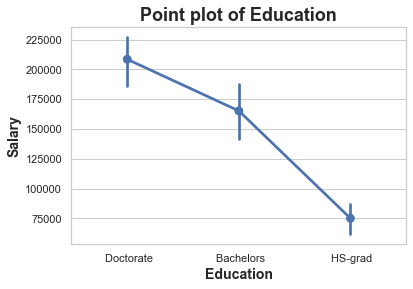

In [89]:
ax =sns.pointplot(x = 'Education', y = 'Salary', data = df1)
ax.set_title('Point plot of Education',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Education', fontsize = 14, fontweight='bold')
ax.set_ylabel('Salary', fontsize = 14, fontweight='bold')
plt.show()

### 3. Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [90]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
aov_table

df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN

In [91]:
p_val = 0.458508
if p_val < 0.05:
    print("The P-Value is low, hence we dont have enough evidence to prove the Null hypothesis")
else:
    print("The P-Value is high, hence it indicates strong evidence for accepting the Null hypothesis.")

The P-Value is high, hence it indicates strong evidence for accepting the Null hypothesis.


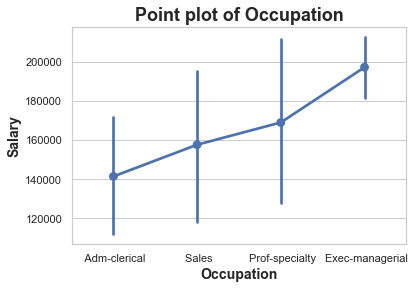

In [92]:
ax =sns.pointplot(x = 'Occupation', y = 'Salary', data = df1)
ax.set_title('Point plot of Occupation',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Occupation', fontsize = 14, fontweight='bold')
ax.set_ylabel('Salary', fontsize = 14, fontweight='bold')
plt.show()

### 4.If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

The Null hypothesis is rejected when we did the ANOVA on salary means based on Education levels. Null hypothesis states here the salary means for all the levels of education is same.
But since it's rejected, hence it means at least one pair of the Salary means based on different Education levels is not equal. 

## Problem 1B:



### 1. What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

In [93]:
formula = 'Salary ~ C(Occupation) + C(Education)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
aov_table

df        sum_sq       mean_sq          F        PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09   2.284576  9.648715e-02
C(Education)    2.0  9.695663e+10  4.847831e+10  29.510933  3.708479e-08
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN

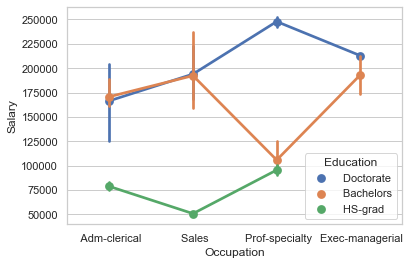

In [94]:
sns.pointplot(x='Occupation', y='Salary', data=df1, hue='Education');

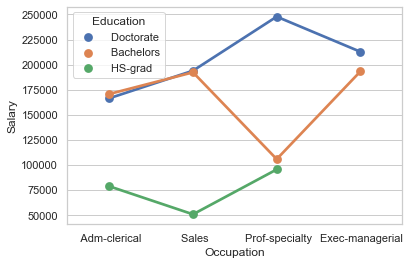

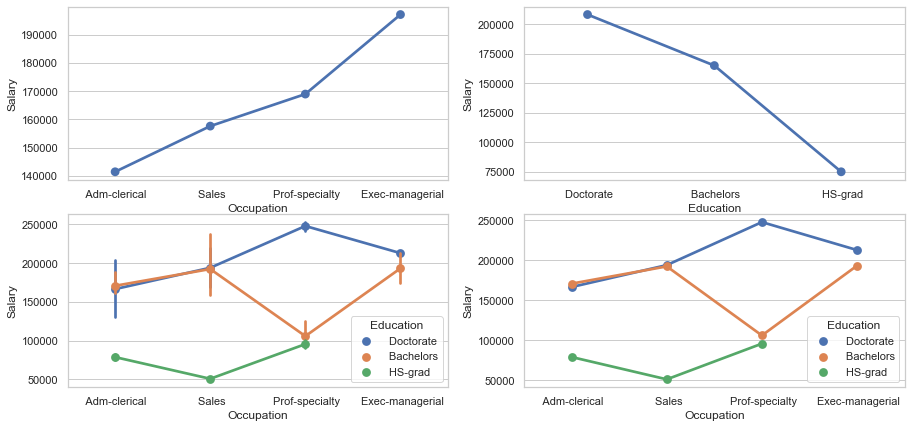

In [279]:
plt.figure(figsize = (15,7))
plt.subplot(2, 2, 1)
sns.pointplot(x='Occupation', y='Salary', data=df1, ci = None);

plt.subplot(2, 2, 2)
sns.pointplot(x='Education', y='Salary', data=df1, ci = None);

plt.subplot(2, 2, 3)
sns.pointplot(x='Occupation', y='Salary', data=df1, hue='Education');

plt.subplot(2, 2, 4)
sns.pointplot(x='Occupation', y='Salary', data=df1, hue='Education', ci = None);

### Inference
1. Doctorate salary mean is approximately same as Bachelors for Sdm-Clerical and Sales professionals.
2. Hs-grad and Bachelors salary mean is almost equal for Prof-Specialty professionals.
3. Hs-Grad are not working as Exec-managerials.
4. Exec-managerials mean salaries are approximately close for Doctorate and Bachelors.
5. Salary mean trends are opposite for Prof- specialities who are Doctorate and Bachelors.

-- This graph shoes some relationships between the Education levels and Occupation levels interactions of salary means.

### 2. Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?


In [97]:
formula = 'Salary ~ C(Occupation) + C(Education) + C(Occupation):C(Education)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
aov_table

df        sum_sq       mean_sq          F  \
C(Occupation)                3.0  1.125878e+10  3.752928e+09   5.277862   
C(Education)                 2.0  9.695663e+10  4.847831e+10  68.176603   
C(Occupation):C(Education)   6.0  3.523330e+10  5.872217e+09   8.258287   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Occupation)               4.993238e-03  
C(Education)                1.090908e-11  
C(Occupation):C(Education)  2.913740e-05  
Residual                             NaN

In [98]:
formula = 'Salary ~ C(Occupation) + C(Education) + C(Occupation):C(Education)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model, type = 2)
aov_table

df        sum_sq       mean_sq          F  \
C(Occupation)                3.0  1.125878e+10  3.752928e+09   5.277862   
C(Education)                 2.0  9.695663e+10  4.847831e+10  68.176603   
C(Occupation):C(Education)   6.0  3.523330e+10  5.872217e+09   8.258287   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Occupation)               4.993238e-03  
C(Education)                1.090908e-11  
C(Occupation):C(Education)  2.913740e-05  
Residual                             NaN

**Null Hypothesis**

1. All population mean of Salary is equal for all the levels of Educations i.e. Mean Salary of Doctorate = Mean Salary of Bachelors = Mean Salary of HS-grad
2. All population mean of Salary is equal for all the levels of Occupations i.e. Mean Salary of Prof-specialty = Mean Salary of Sales = Mean Salary of Adm-clerical = Mean Salary of Exec-managerial

**Alternative Hypothesis**

1. Not all population mean of Salary is equal. At least one pair of population mean is not equal for all the levels of Education.
2. Not all population mean of Salary is equal. At least one pair of population mean is not equal for all the levels of Occupations

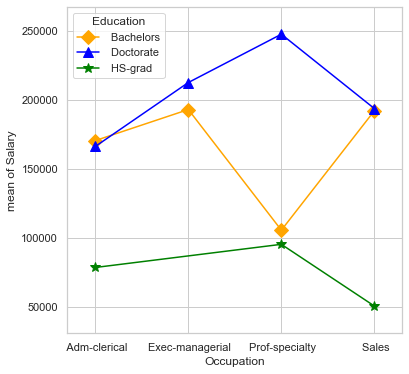

In [99]:
from statsmodels.graphics.factorplots import interaction_plot
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=df1['Occupation'],
    trace=df1['Education'],
    response=df1['Salary'],
    colors=["Orange", "Blue","Green"],
    markers=["D", "^","*"],
    ms=10,
    ax=ax
)

In [100]:
p_val_dic = {'Occupation' : 4.993238e-03, 'Education': 1.090908e-11, 'Occupation:Education':  2.913740e-05}
for i in p_val_dic.keys():
    if p_val_dic[i] < 0.05:
        print(f"The P-Value is low, hence we dont have enough evidence to prove the Null hypothesis for {i}")
    else:
        print("The P-Value is high, hence it indicates strong evidence for accepting the Null hypothesis for {i}")

The P-Value is low, hence we dont have enough evidence to prove the Null hypothesis for Occupation
The P-Value is low, hence we dont have enough evidence to prove the Null hypothesis for Education
The P-Value is low, hence we dont have enough evidence to prove the Null hypothesis for Occupation:Education


# PROBLEM 2
# Education Data Analysis

The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [101]:
df2 = pd.read_csv("Education+-+Post+12th+Standard.csv")

In [102]:
## Size of the dataset
df2.shape

(777, 18)

In [103]:
pd.options.display.width=None
df2.head(3)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54

In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [105]:
df2.describe(include="all").T

count unique                        top freq     mean      std  \
Names         777    777  Michigan State University    1      NaN      NaN   
Apps          777    NaN                        NaN  NaN  3001.64   3870.2   
Accept        777    NaN                        NaN  NaN   2018.8  2451.11   
Enroll        777    NaN                        NaN  NaN  779.973  929.176   
Top10perc     777    NaN                        NaN  NaN  27.5586  17.6404   
Top25perc     777    NaN                        NaN  NaN  55.7967  19.8048   
F.Undergrad   777    NaN                        NaN  NaN  3699.91  4850.42   
P.Undergrad   777    NaN                        NaN  NaN  855.299  1522.43   
Outstate      777    NaN                        NaN  NaN  10440.7  4023.02   
Room.Board    777    NaN                        NaN  NaN  4357.53   1096.7   
Books         777    NaN                        NaN  NaN  549.381  165.105   
Personal      777    NaN                        NaN  NaN  1340.64  677.071   
PhD           777    NaN                        NaN  NaN  72.6602  16.3282   
Terminal      777    NaN                        NaN  NaN  79.7027  14.7224   
S.F.Ratio     777    NaN                        NaN  NaN  14.0897  3.95835   
perc.alumni   777    NaN                        NaN  NaN  22.7439  12.3918   
Expend        777    NaN                        NaN  NaN  9660.17  5221.77   
Grad.Rate     777    NaN                        NaN  NaN  65.4633  17.1777   

              min   25%   50%    75%    max  
Names         NaN   NaN   NaN    NaN    NaN  
Apps           81   776  1558   3624  48094  
Accept         72   604  1110   2424  26330  
Enroll         35   242   434    902   6392  
Top10perc       1    15    23     35     96  
Top25perc       9    41    54     69    100  
F.Undergrad   139   992  1707   4005  31643  
P.Undergrad     1    95   353    967  21836  
Outstate     2340  7320  9990  12925  21700  
Room.Board   1780  3597  4200   5050   8124  
Books          96   470   500    600   2340  
Personal      250   850  1200   1700   6800  
PhD             8    62    75     85    103  
Terminal       24    71    82     92    100  
S.F.Ratio     2.5  11.5  13.6   16.5   39.8  
perc.alumni     0    13    21     31     64  
Expend       3186  6751  8377  10830  56233  
Grad.Rate      10    53    65     78    118

### 1. Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?
**Step 1: Checking Duplicate rows**

In [106]:
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


**Step 2: Checking Outliers**
1. Finding Outliers with Boxplot

In [107]:
Feature_List = df2.select_dtypes(['int64','float64']).columns
Feature_List

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

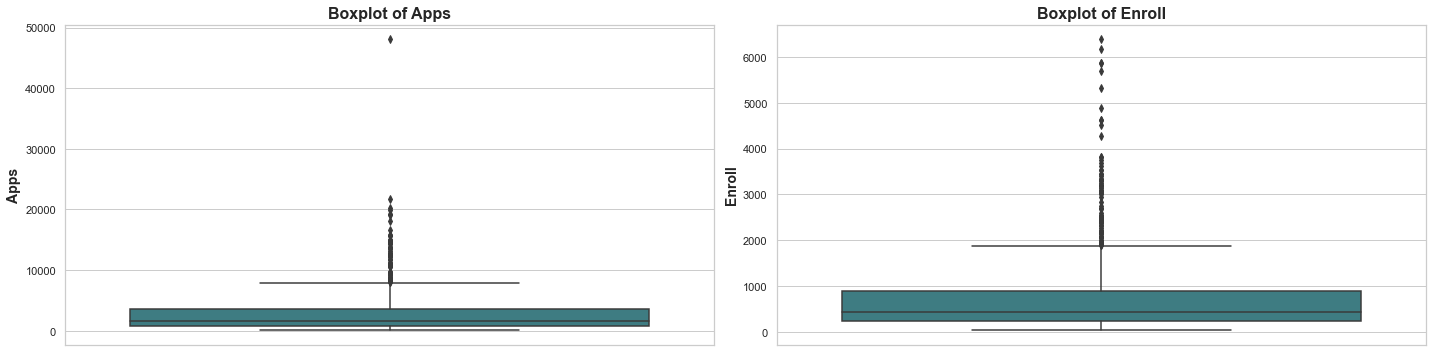

In [108]:
x = 0
plt.figure(figsize = (20,5))
for i in range(0,3):
    if i%2 == 0:
        x = x + 1
        plt.subplot(1,2,x)
        sns.boxplot(y = df2[Feature_List[i]], data = df2,palette = 'crest')
        plt.title(f"Boxplot of {Feature_List[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel( Feature_List[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

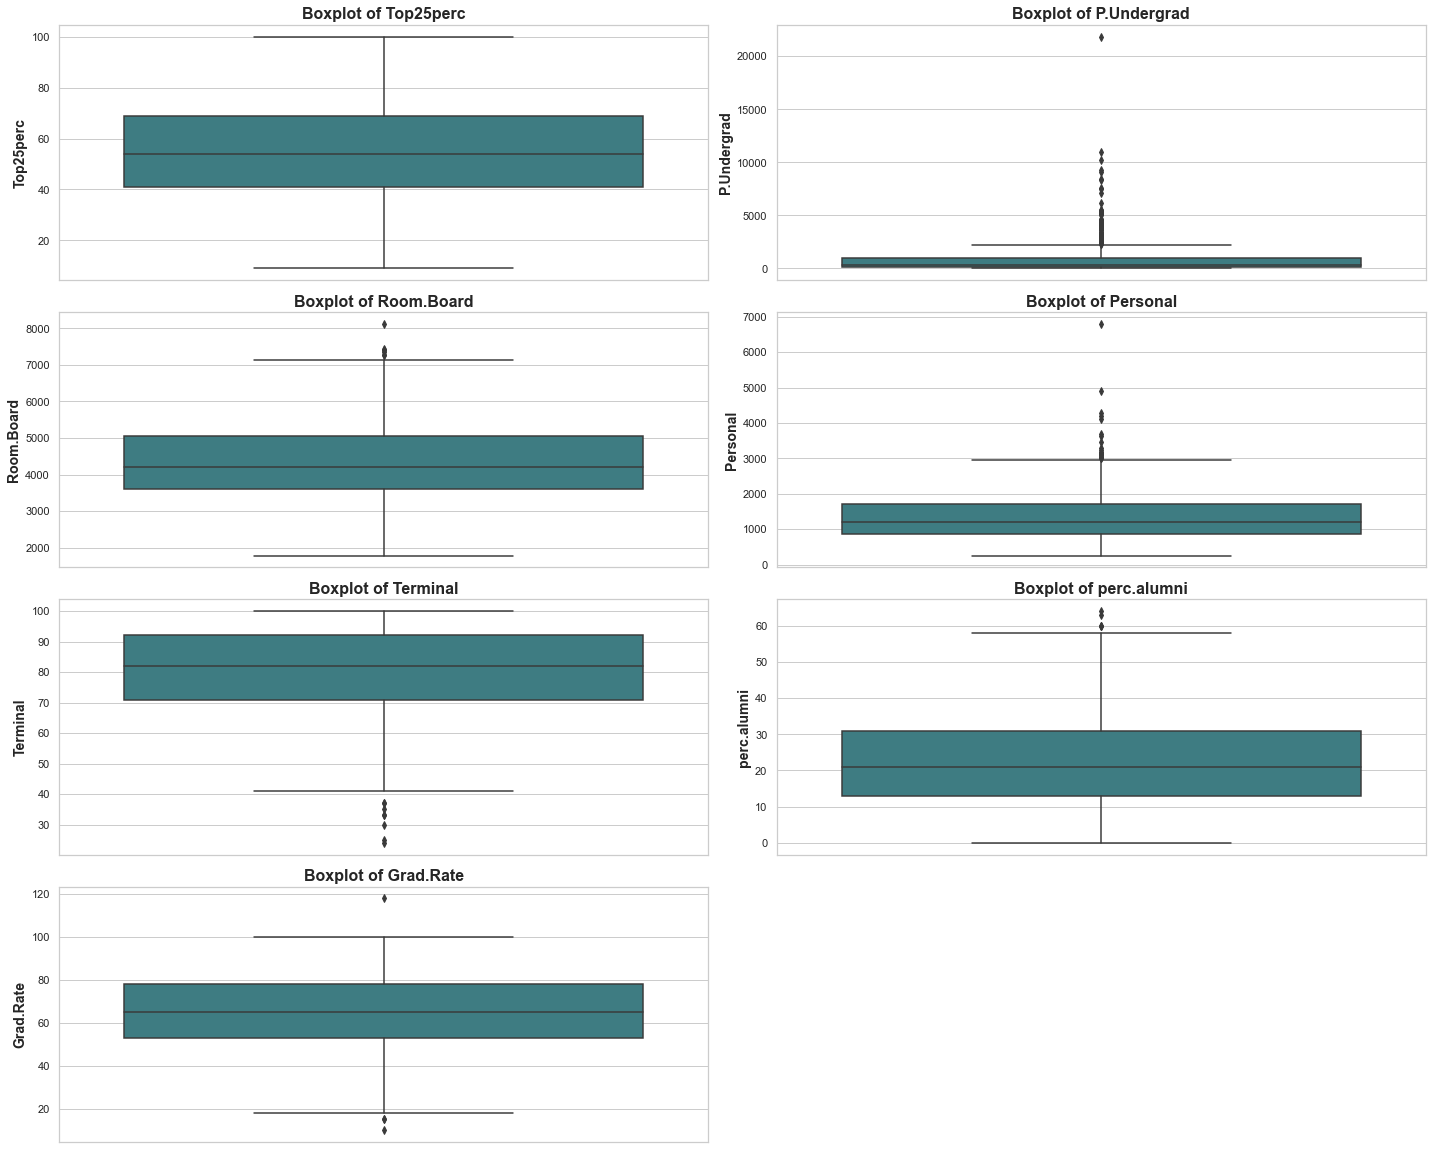

In [109]:
x = 0
plt.figure(figsize = (20,40))
for i in range(3,len(Feature_List)):
    if i%2 == 0:
        x = x + 1
        plt.subplot(10,2,x)
        sns.boxplot(y = df2[Feature_List[i]], data = df2,palette = 'crest')
        plt.title(f"Boxplot of {Feature_List[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel( Feature_List[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

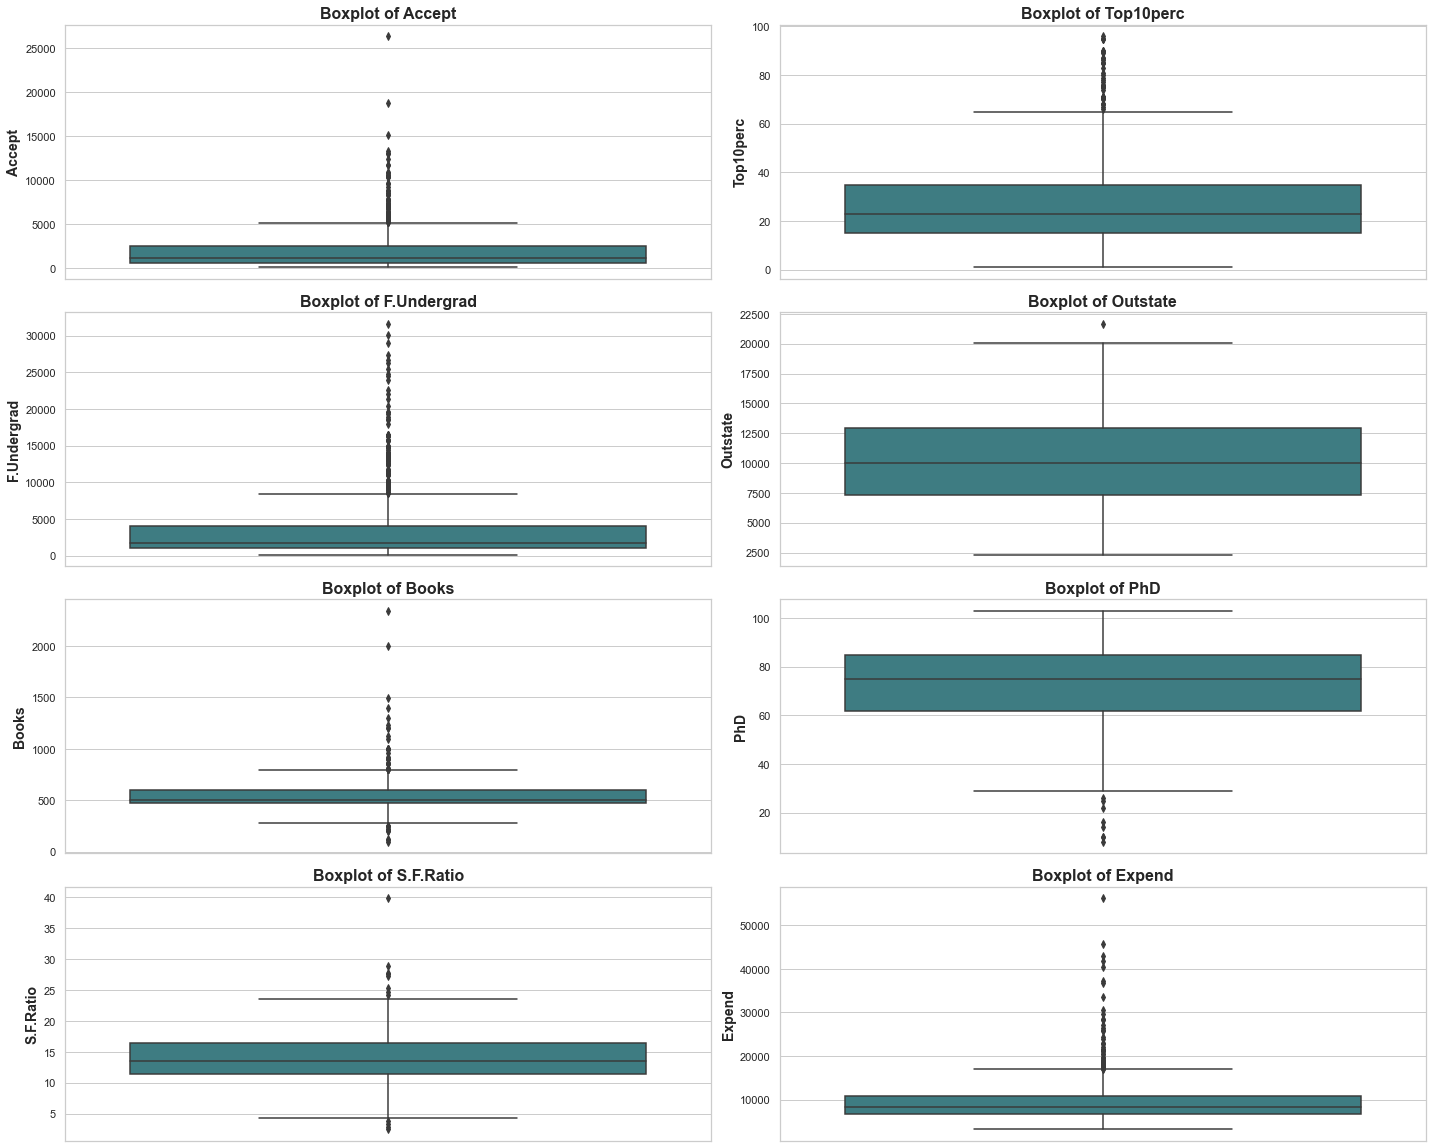

In [110]:
x = 0
plt.figure(figsize = (20,40))
for i in range(len(Feature_List)):
    if i%2 != 0:
        x = x + 1
        plt.subplot(10,2,x)
        sns.boxplot(y = df2[Feature_List[i]], data = df2,palette = 'crest')
        plt.title(f"Boxplot of {Feature_List[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel( Feature_List[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

**Step 3: Checking Missing Values**

In [111]:
df2.isnull().any()

Names          False
Apps           False
Accept         False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
dtype: bool

**Step 4: Univariate Analysis**

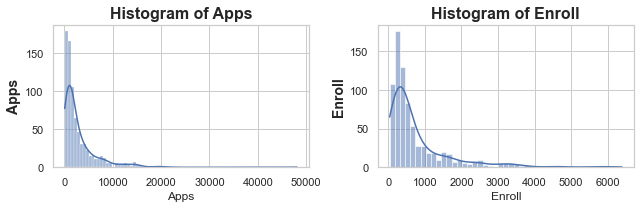

In [112]:
x = 0
plt.figure(figsize = (9,3))
for i in range(0,3):
    if i%2 == 0:
        x = x + 1
        plt.subplot(1,2,x)
        sns.histplot(df2[Feature_List[i]], kde=True)
        plt.title(f"Histogram of {Feature_List[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel( Feature_List[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

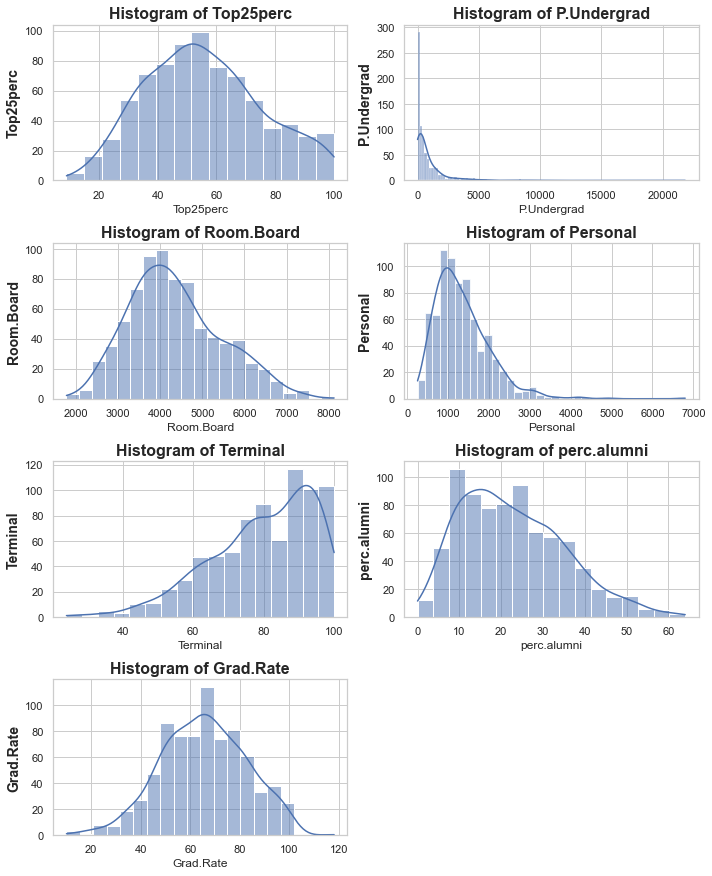

In [113]:
x = 0
plt.figure(figsize = (10,30))
for i in range(3,len(Feature_List)):
    if i%2 == 0:
        x = x + 1
        plt.subplot(10,2,x)
        sns.histplot(df2[Feature_List[i]], kde=True)
        plt.title(f"Histogram of {Feature_List[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel( Feature_List[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

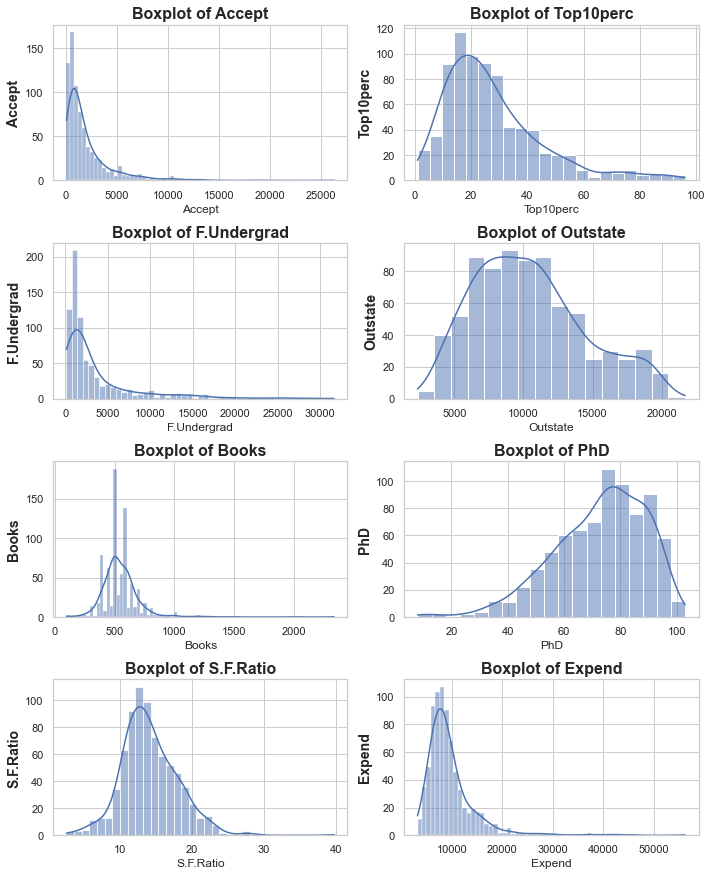

In [114]:
x = 0
plt.figure(figsize = (10,30))
for i in range(len(Feature_List)):
    if i%2 != 0:
        x = x + 1
        plt.subplot(10,2,x)
        sns.histplot(df2[Feature_List[i]], kde=True)
        plt.title(f"Boxplot of {Feature_List[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel( Feature_List[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

**Calculate Skewness of the Fields**

In [128]:
from scipy.stats import skew
for i in Feature_List:
    print(f"Skewness of {i} is {skew(df2[i])}")

Skewness of Apps is 3.7165574035202718
Skewness of Accept is 3.4111258724395235
Skewness of Enroll is 2.6852679191653412
Skewness of Top10perc is 1.410487098842332
Skewness of Top25perc is 0.2588394269741162
Skewness of F.Undergrad is 2.6054157486361564
Skewness of P.Undergrad is 5.681358169711681
Skewness of Outstate is 0.508294284359404
Skewness of Room.Board is 0.4764335489968277
Skewness of Books is 3.478293278376379
Skewness of Personal is 1.7391308384291781
Skewness of PhD is -0.7666863621506335
Skewness of Terminal is -0.8149651536781263
Skewness of S.F.Ratio is 0.6661461873546756
Skewness of perc.alumni is 0.6057189848601131
Skewness of Expend is 3.4526399033472197
Skewness of Grad.Rate is -0.11355752571272018


**Step 5: Bivariant Analysis**

*This can be done both by PairPlot and Correlation Heat Map*

<Figure size 720x2160 with 0 Axes>

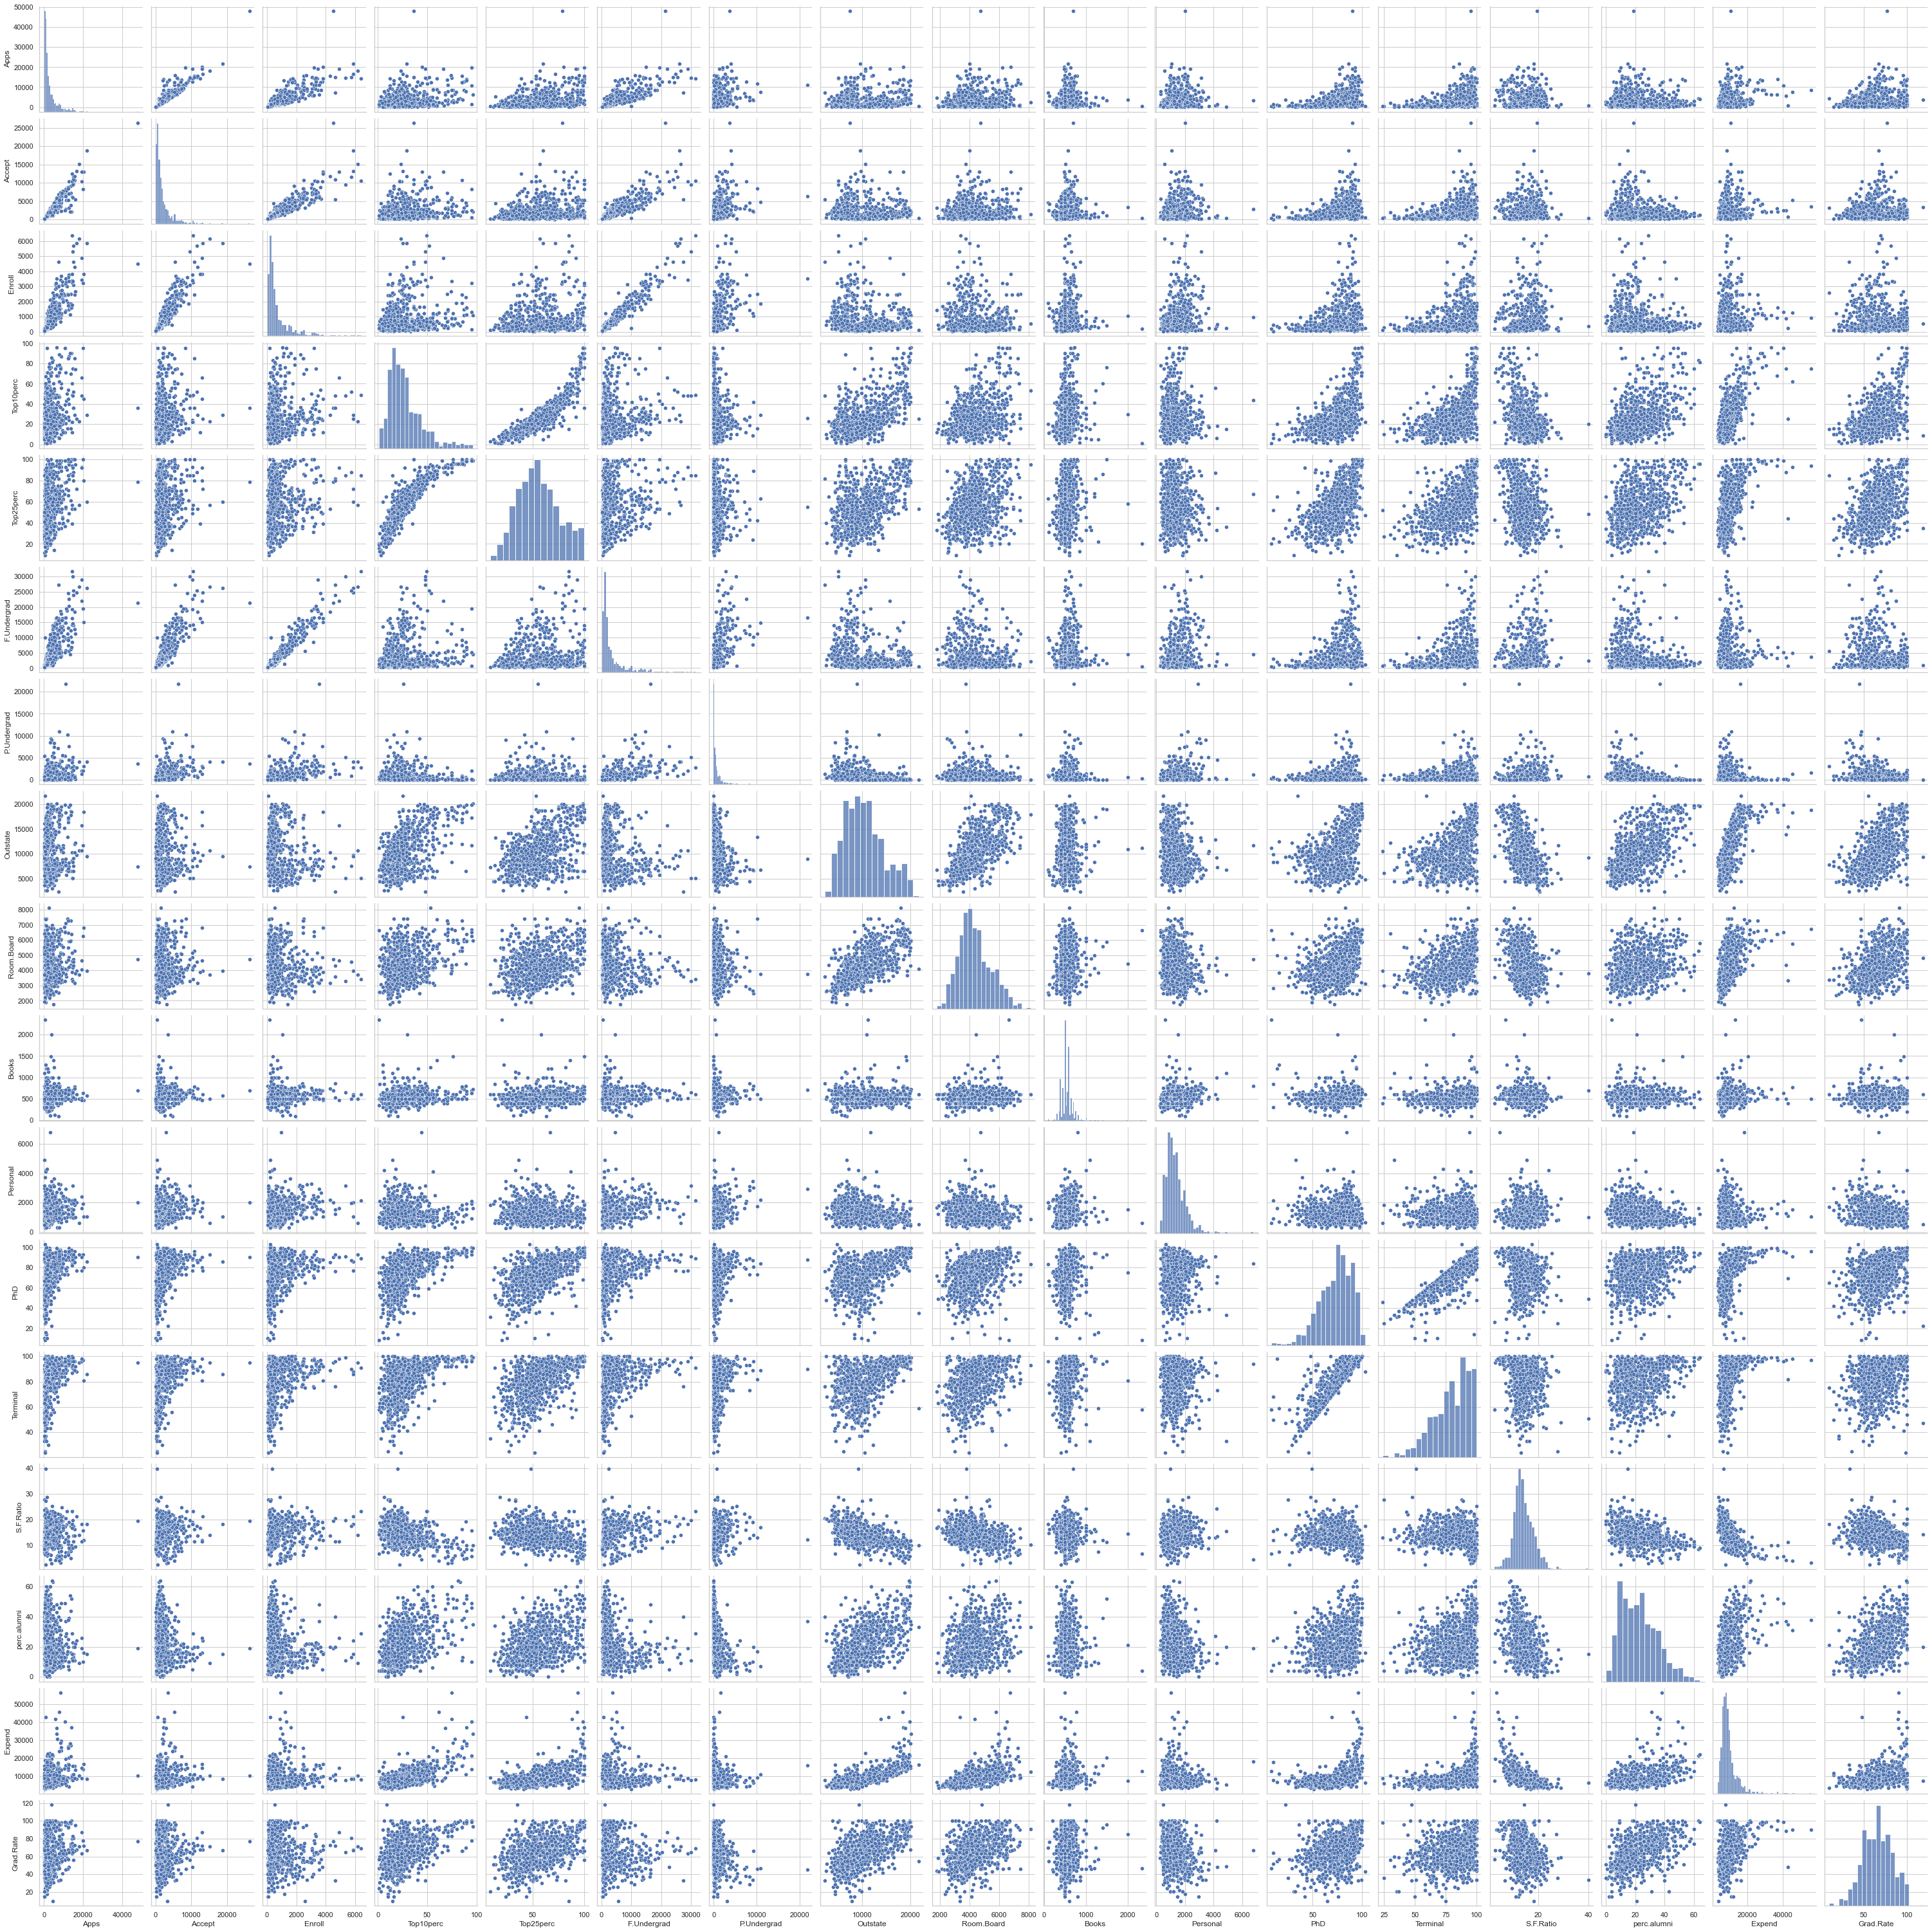

In [127]:
plt.figure(figsize = (10,30))
sns.pairplot(data = df2);
plt.show()

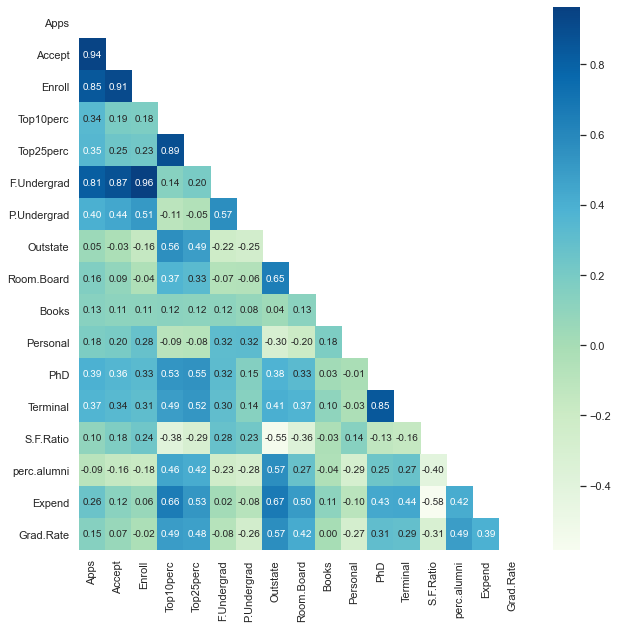

In [129]:
# creating mask
mask = np.triu(np.ones_like(df2.corr()))

plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True,fmt=".2f",cmap='GnBu', mask = mask);

### 2. Is scaling necessary for PCA in this case? Give justification and perform scaling.

To find out if scaling is required or not, we will be analysing the rage of the values in the fields.

In [130]:
df2.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

**As observed in the above descriptive statistics, the range of fields vary from one another. Hence, we would require scaling for doing PCA**

#### Scaling

In [131]:
from sklearn.preprocessing import StandardScaler

#Intilizing object of StandardScaler
 
zscore = StandardScaler()

#Fitting the StandardScaler object with the Train Set
 
zscore.fit(df2.select_dtypes(['int64','float64']))

#Scalling the Train & Test sets using the fitted StandardScaler object
 
df2_scaled= pd.DataFrame(zscore.transform(df2.select_dtypes(['int64','float64'])),columns = 
df2.select_dtypes(['int64','float64']).columns) 

In [120]:
df2_scaled.describe().T

count          mean       std       min       25%       50%  \
Apps         777.0  6.355797e-17  1.000644 -0.755134 -0.575441 -0.373254   
Accept       777.0  6.774575e-17  1.000644 -0.794764 -0.577581 -0.371011   
Enroll       777.0 -5.249269e-17  1.000644 -0.802273 -0.579351 -0.372584   
Top10perc    777.0 -2.753232e-17  1.000644 -1.506526 -0.712380 -0.258583   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -1.661405e-16  1.000644 -0.734617 -0.558643 -0.411138   
P.Undergrad  777.0 -3.029180e-17  1.000644 -0.561502 -0.499719 -0.330144   
Outstate     777.0  6.515595e-17  1.000644 -2.014878 -0.776203 -0.112095   
Room.Board   777.0  3.570717e-16  1.000644 -2.351778 -0.693917 -0.143730   
Books        777.0 -2.192583e-16  1.000644 -2.747779 -0.481099 -0.299280   
Personal     777.0  4.765243e-17  1.000644 -1.611860 -0.725120 -0.207855   
PhD          777.0  5.954768e-17  1.000644 -3.962596 -0.653295  0.143389   
Terminal     777.0 -4.481615e-16  1.000644 -3.785982 -0.591502  0.156142   
S.F.Ratio    777.0 -2.057556e-17  1.000644 -2.929799 -0.654660 -0.123794   
perc.alumni  777.0 -6.022638e-17  1.000644 -1.836580 -0.786824 -0.140820   
Expend       777.0  1.213101e-16  1.000644 -1.240641 -0.557483 -0.245893   
Grad.Rate    777.0  3.886495e-16  1.000644 -3.230876 -0.726019 -0.026990   

                  75%        max  
Apps         0.160912  11.658671  
Accept       0.165417   9.924816  
Enroll       0.131413   6.043678  
Top10perc    0.422113   3.882319  
Top25perc    0.667104   2.233391  
F.Undergrad  0.062941   5.764674  
P.Undergrad  0.073418  13.789921  
Outstate     0.617927   2.800531  
Room.Board   0.631824   3.436593  
Books        0.306784  10.852297  
Personal     0.531095   8.068387  
PhD          0.756222   1.859323  
Terminal     0.835818   1.379560  
S.F.Ratio    0.609307   6.499390  
perc.alumni  0.666685   3.331452  
Expend       0.224174   8.924721  
Grad.Rate    0.730293   3.060392

### 3. Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

In [132]:
list1 = Feature_List[:len(Feature_List)//2]
df2_scaled.corr()[list1]

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  
Apps            0.398264  0.050159  
Accept          0.441271 -0.025755  
Enroll          0.513069 -0.155477  
Top10perc      -0.105356  0.562331  
Top25perc      -0.053577  0.489394  
F.Undergrad     0.570512 -0.215742  
P.Undergrad     1.000000 -0.253512  
Outstate       -0.253512  1.000000  
Room.Board     -0.061326  0.654256  
Books           0.081200  0.038855  
Personal        0.319882 -0.299087  
PhD             0.149114  0.382982  
Terminal        0.141904  0.407983  
S.F.Ratio       0.232531 -0.554821  
perc.alumni    -0.280792  0.566262  
Expend         -0.083568  0.672779  
Grad.Rate      -0.257001  0.571290

In [133]:
list2 = Feature_List[len(Feature_List)//2 :]
df2_scaled.corr()[list2]

Room.Board     Books  Personal       PhD  Terminal  S.F.Ratio  \
Apps           0.164939  0.132559  0.178731  0.390697  0.369491   0.095633   
Accept         0.090899  0.113525  0.200989  0.355758  0.337583   0.176229   
Enroll        -0.040232  0.112711  0.280929  0.331469  0.308274   0.237271   
Top10perc      0.371480  0.118858 -0.093316  0.531828  0.491135  -0.384875   
Top25perc      0.331490  0.115527 -0.080810  0.545862  0.524749  -0.294629   
F.Undergrad   -0.068890  0.115550  0.317200  0.318337  0.300019   0.279703   
P.Undergrad   -0.061326  0.081200  0.319882  0.149114  0.141904   0.232531   
Outstate       0.654256  0.038855 -0.299087  0.382982  0.407983  -0.554821   
Room.Board     1.000000  0.127963 -0.199428  0.329202  0.374540  -0.362628   
Books          0.127963  1.000000  0.179295  0.026906  0.099955  -0.031929   
Personal      -0.199428  0.179295  1.000000 -0.010936 -0.030613   0.136345   
PhD            0.329202  0.026906 -0.010936  1.000000  0.849587  -0.130530   
Terminal       0.374540  0.099955 -0.030613  0.849587  1.000000  -0.160104   
S.F.Ratio     -0.362628 -0.031929  0.136345 -0.130530 -0.160104   1.000000   
perc.alumni    0.272363 -0.040208 -0.285968  0.249009  0.267130  -0.402929   
Expend         0.501739  0.112409 -0.097892  0.432762  0.438799  -0.583832   
Grad.Rate      0.424942  0.001061 -0.269344  0.305038  0.289527  -0.306710   

             perc.alumni    Expend  Grad.Rate  
Apps           -0.090226  0.259592   0.146755  
Accept         -0.159990  0.124717   0.067313  
Enroll         -0.180794  0.064169  -0.022341  
Top10perc       0.455485  0.660913   0.494989  
Top25perc       0.417864  0.527447   0.477281  
F.Undergrad    -0.229462  0.018652  -0.078773  
P.Undergrad    -0.280792 -0.083568  -0.257001  
Outstate        0.566262  0.672779   0.571290  
Room.Board      0.272363  0.501739   0.424942  
Books          -0.040208  0.112409   0.001061  
Personal       -0.285968 -0.097892  -0.269344  
PhD             0.249009  0.432762   0.305038  
Terminal        0.267130  0.438799   0.289527  
S.F.Ratio      -0.402929 -0.583832  -0.306710  
perc.alumni     1.000000  0.417712   0.490898  
Expend          0.417712  1.000000   0.390343  
Grad.Rate       0.490898  0.390343   1.000000

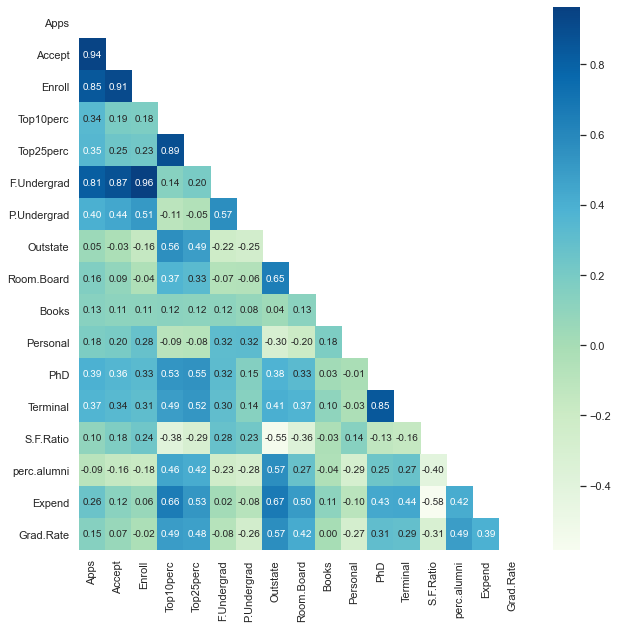

In [216]:
# creating mask
mask = np.triu(np.ones_like(df2_scaled.corr()))

plt.figure(figsize=(10,10))
sns.heatmap(df2_scaled.corr(),annot=True,fmt=".2f",cmap='GnBu', mask = mask);

### 4. Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

#### 4.a Checking the Outliers using HeatMap before scaling

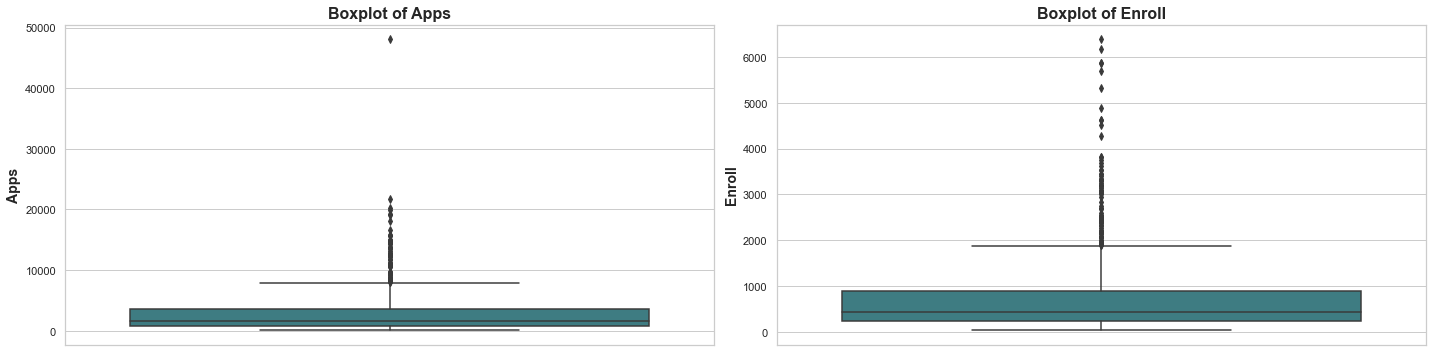

In [135]:
x = 0
plt.figure(figsize = (20,5))
for i in range(0,3):
    if i%2 == 0:
        x = x + 1
        plt.subplot(1,2,x)
        sns.boxplot(y = df2[Feature_List[i]], data = df2,palette = 'crest')
        plt.title(f"Boxplot of {Feature_List[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel( Feature_List[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

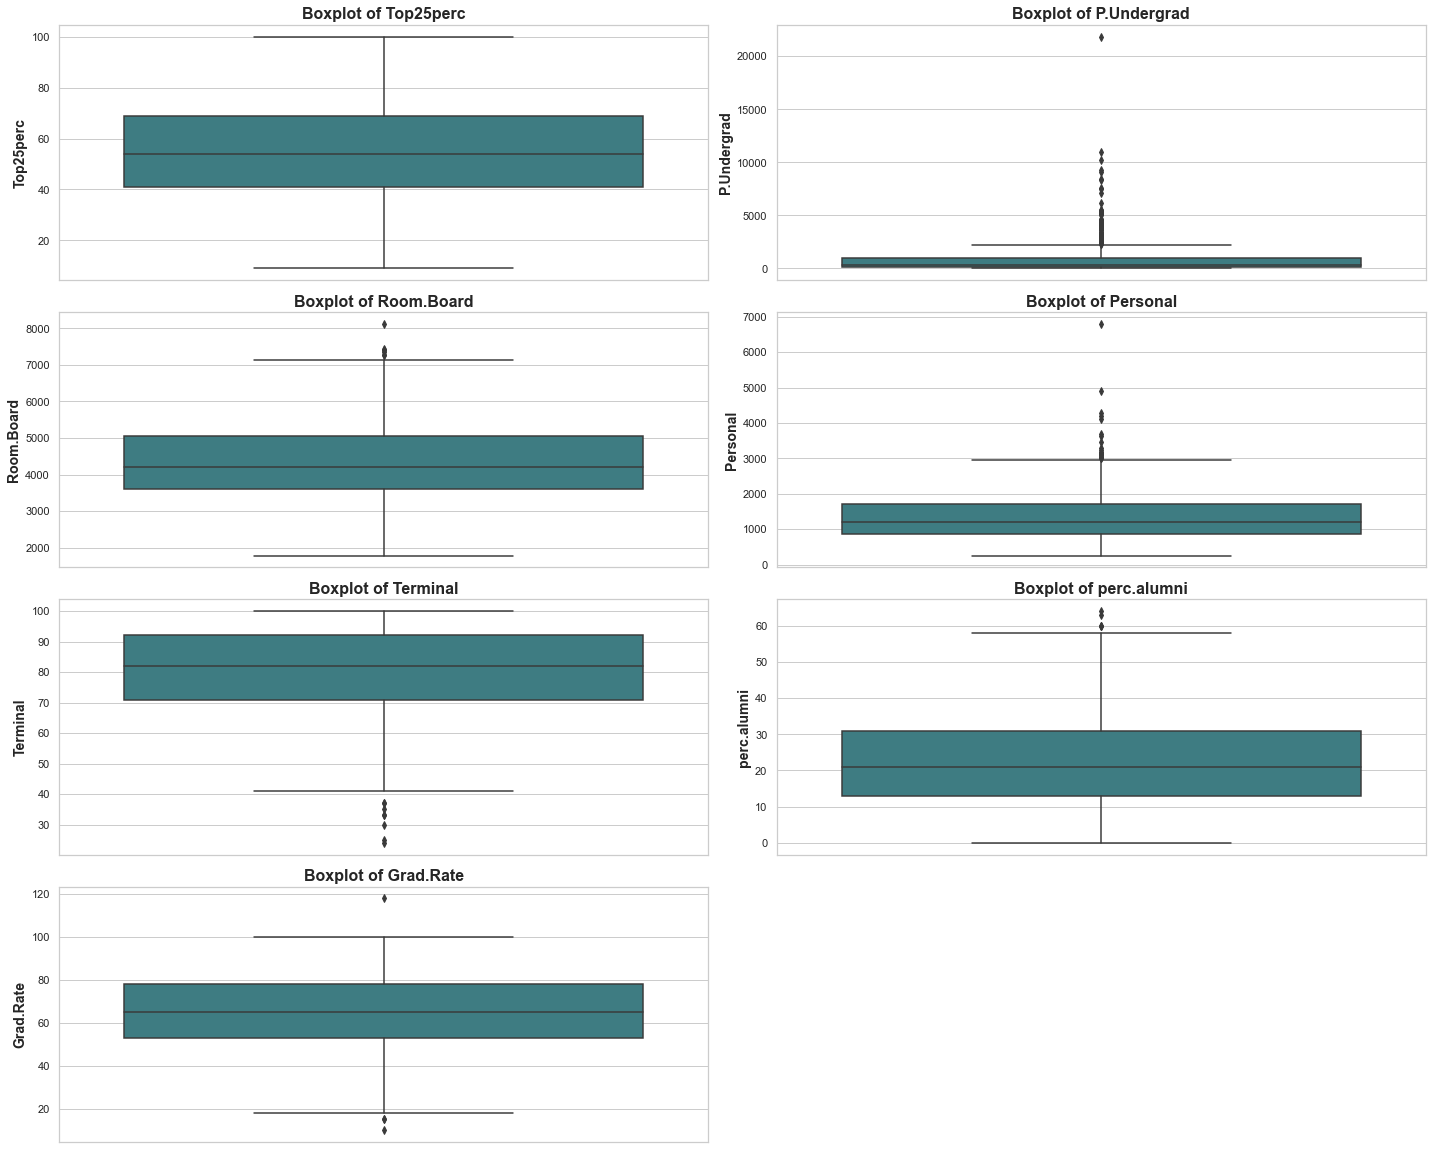

In [136]:
x = 0
plt.figure(figsize = (20,40))
for i in range(3,len(Feature_List)):
    if i%2 == 0:
        x = x + 1
        plt.subplot(10,2,x)
        sns.boxplot(y = df2[Feature_List[i]], data = df2,palette = 'crest')
        plt.title(f"Boxplot of {Feature_List[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel( Feature_List[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

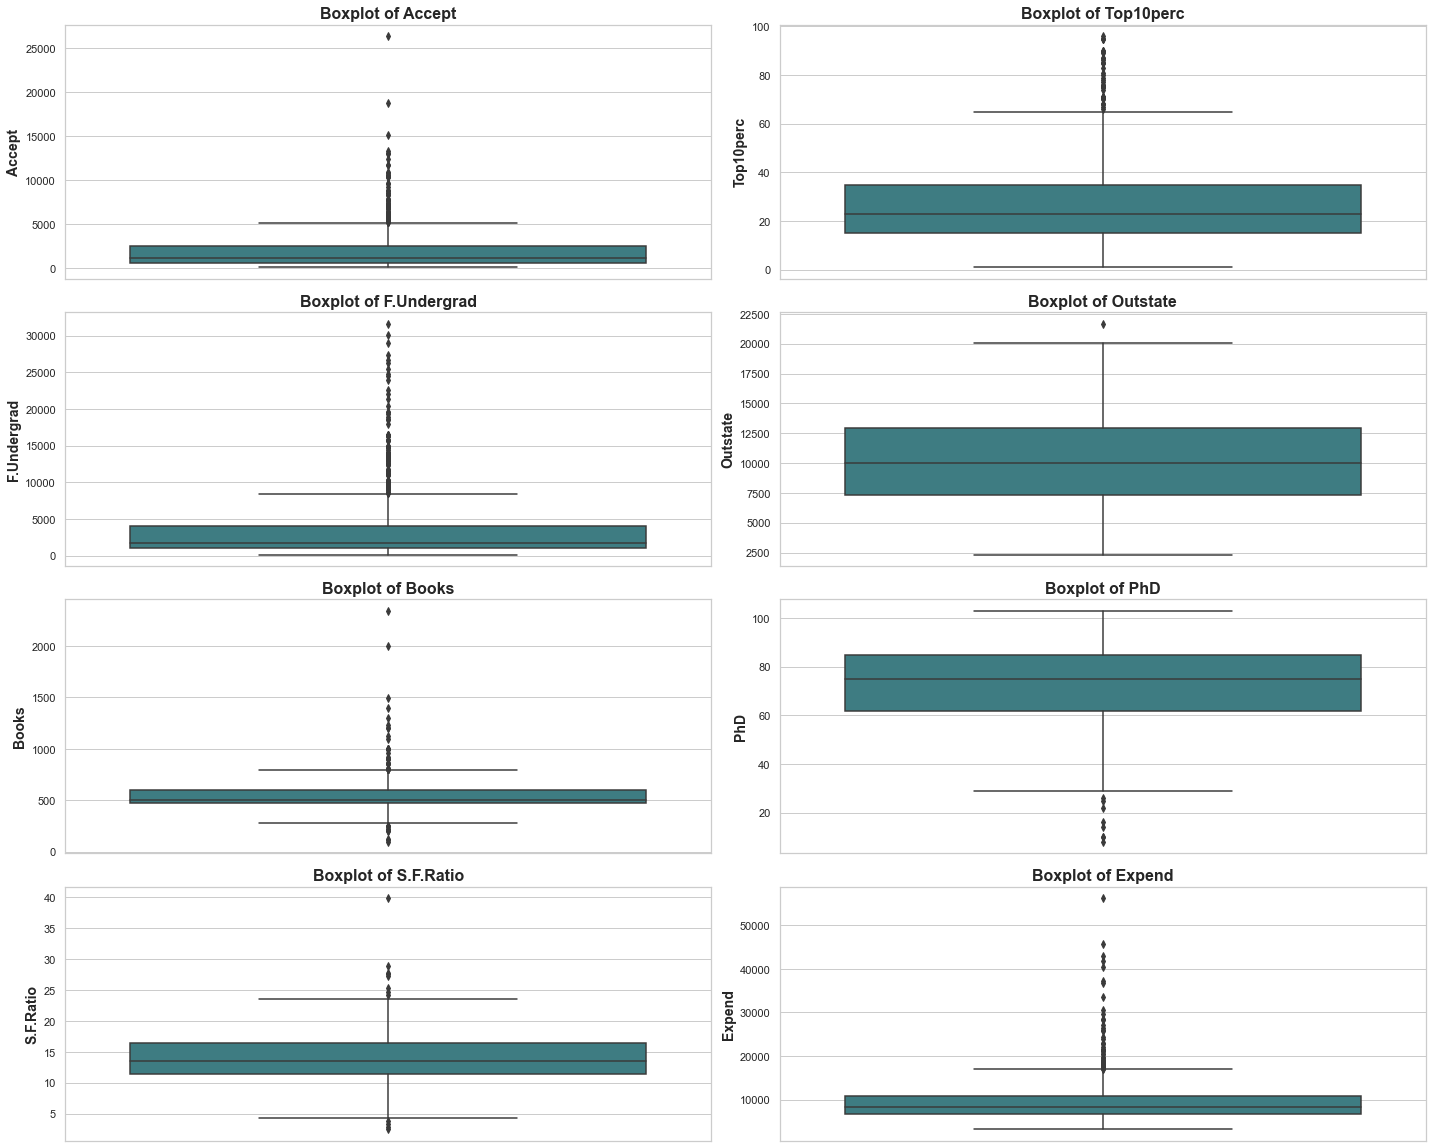

In [126]:
x = 0
plt.figure(figsize = (20,40))
for i in range(len(Feature_List)):
    if i%2 != 0:
        x = x + 1
        plt.subplot(10,2,x)
        sns.boxplot(y = df2[Feature_List[i]], data = df2,palette = 'crest')
        plt.title(f"Boxplot of {Feature_List[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel( Feature_List[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

#### 4.a Checking the Outliers using HeatMap before scaling

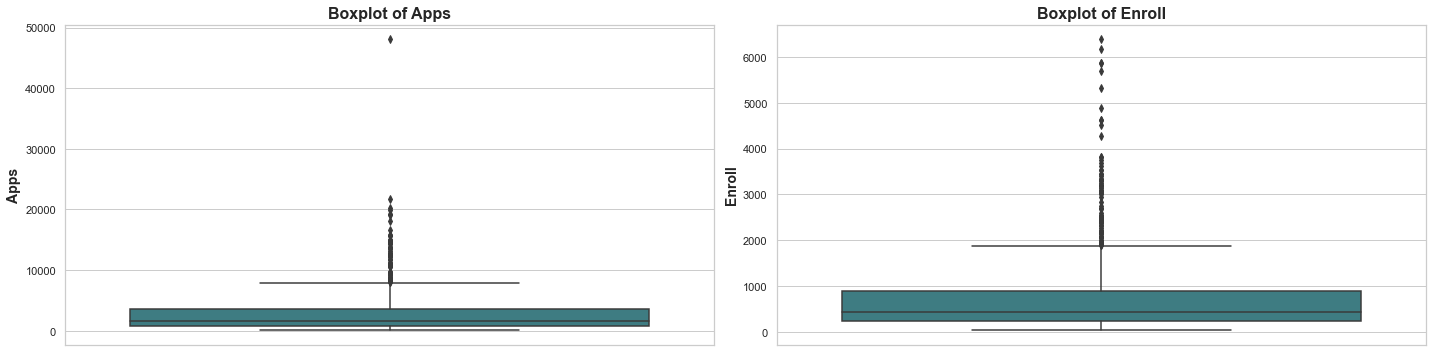

In [143]:
x = 0
plt.figure(figsize = (20,5))
for i in range(0,3):
    if i%2 == 0:
        x = x + 1
        plt.subplot(1,2,x)
        sns.boxplot(y = df2[Feature_List[i]], data = df2,palette = 'crest')
        plt.title(f"Boxplot of {Feature_List[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel( Feature_List[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

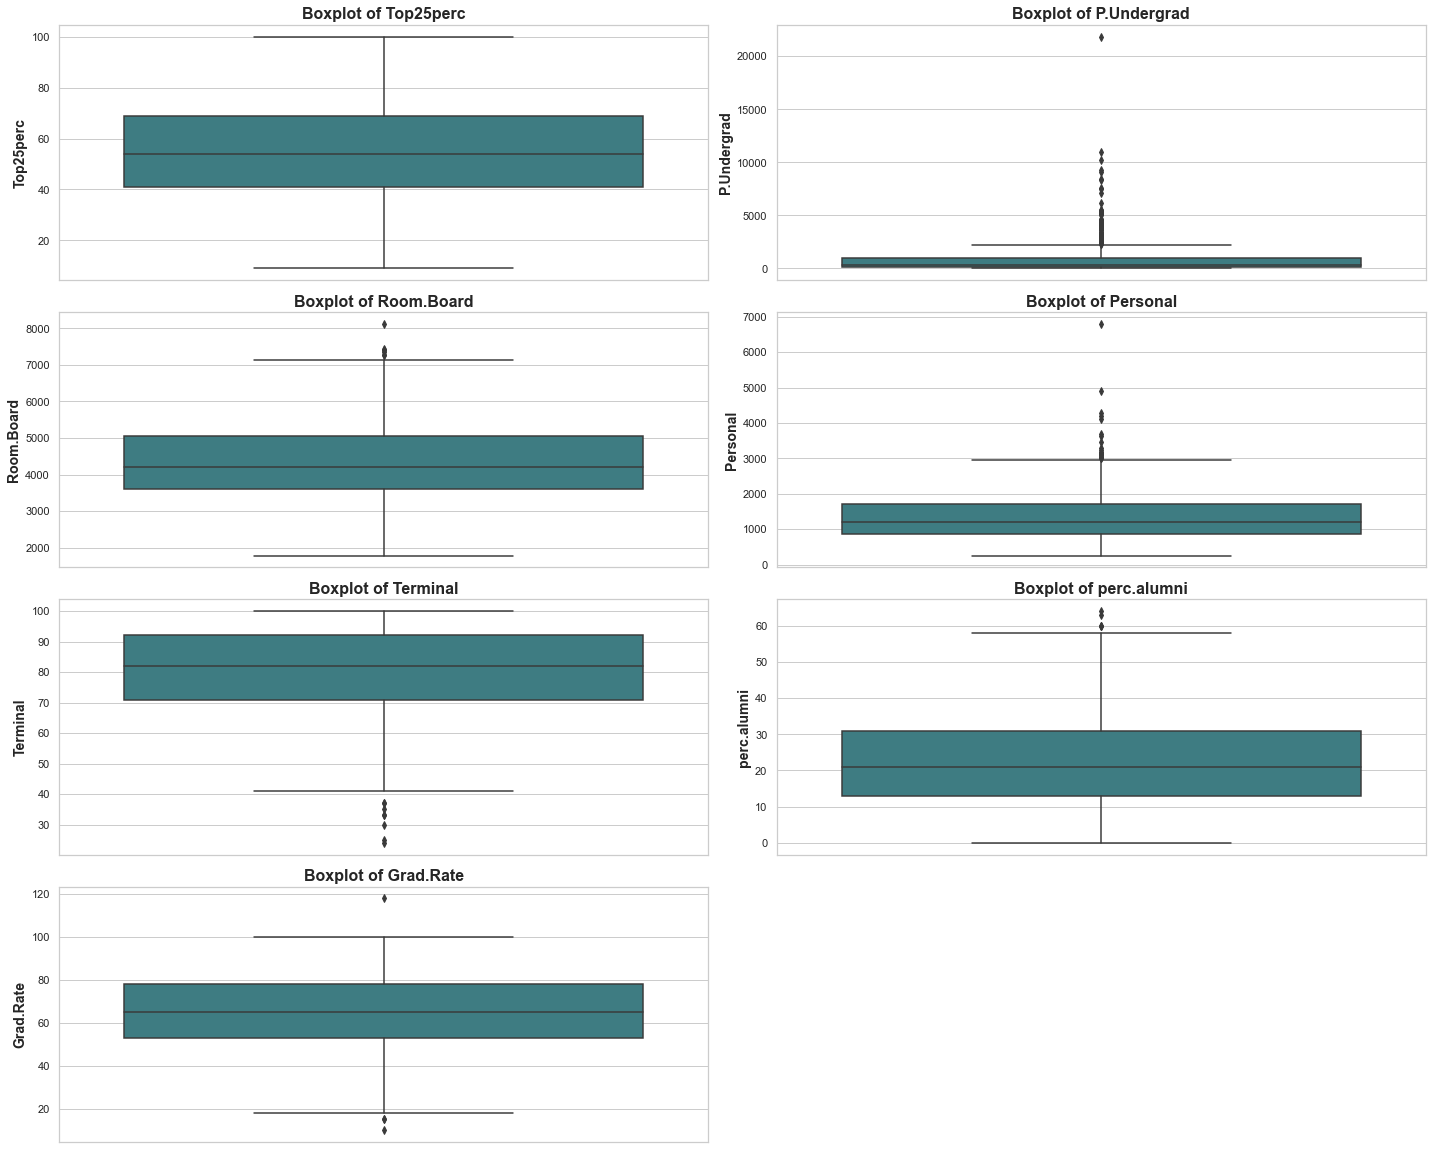

In [140]:
x = 0
plt.figure(figsize = (20,40))
for i in range(3,len(Feature_List)):
    if i%2 == 0:
        x = x + 1
        plt.subplot(10,2,x)
        sns.boxplot(y = df2[Feature_List[i]], data = df2,palette = 'crest')
        plt.title(f"Boxplot of {Feature_List[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel( Feature_List[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

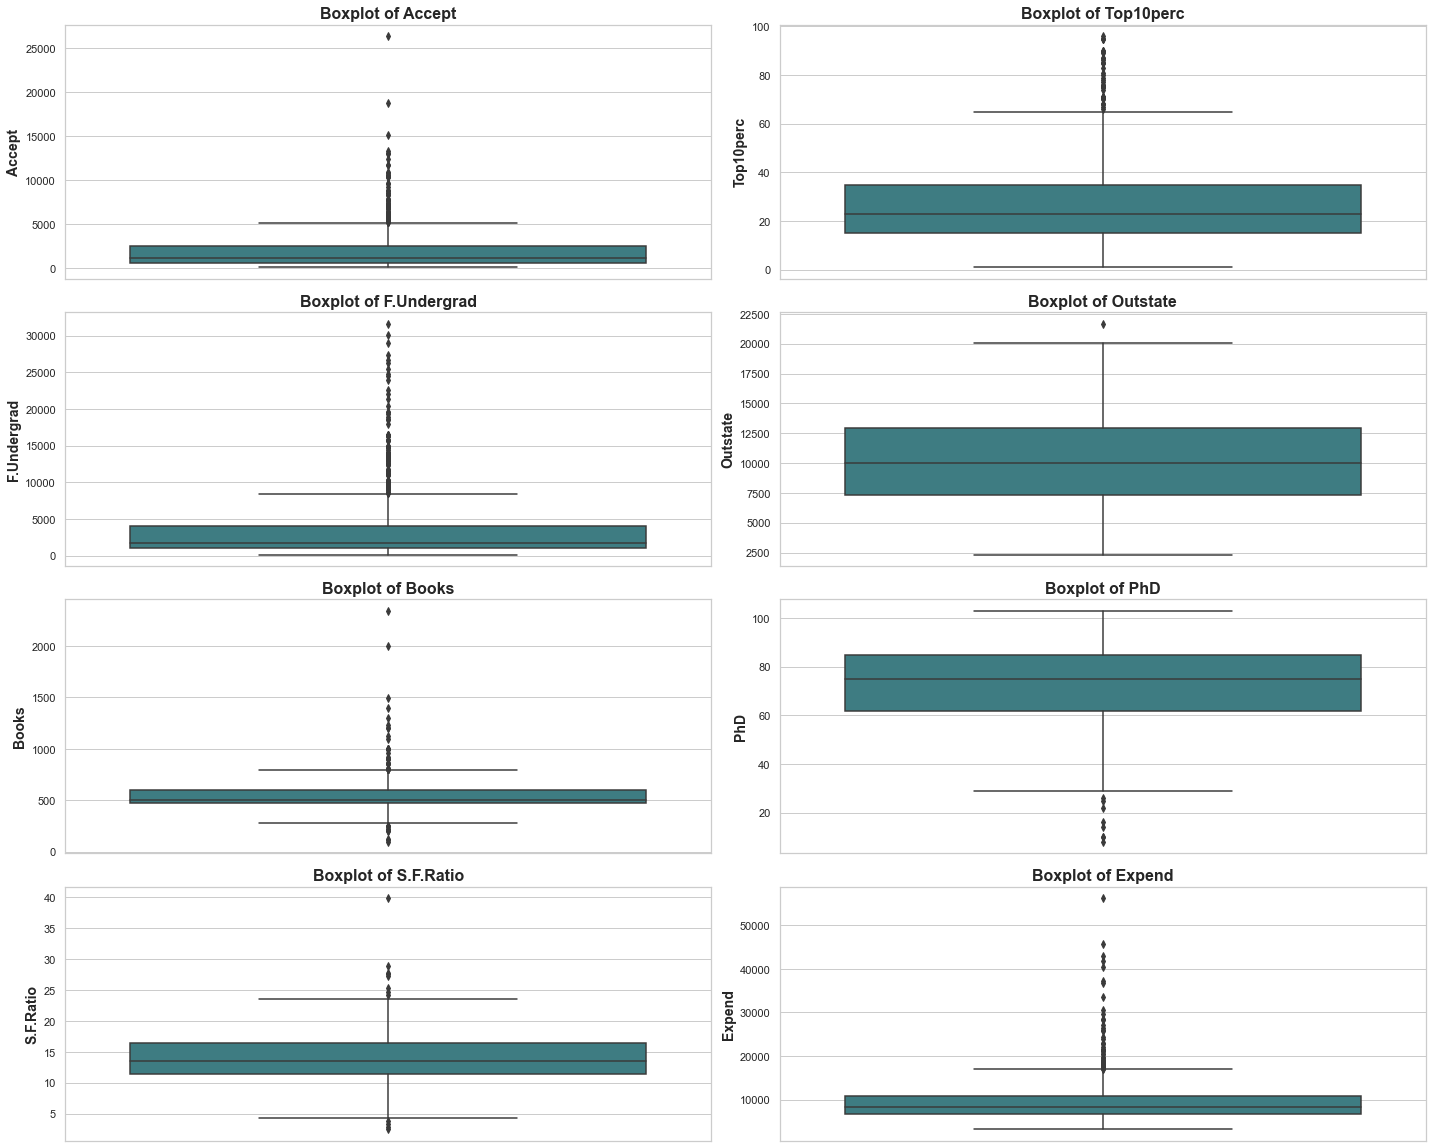

In [141]:
x = 0
plt.figure(figsize = (20,40))
for i in range(len(Feature_List)):
    if i%2 != 0:
        x = x + 1
        plt.subplot(10,2,x)
        sns.boxplot(y = df2[Feature_List[i]], data = df2,palette = 'crest')
        plt.title(f"Boxplot of {Feature_List[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel( Feature_List[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

#### 4.a Checking the Outliers using HeatMap After scaling

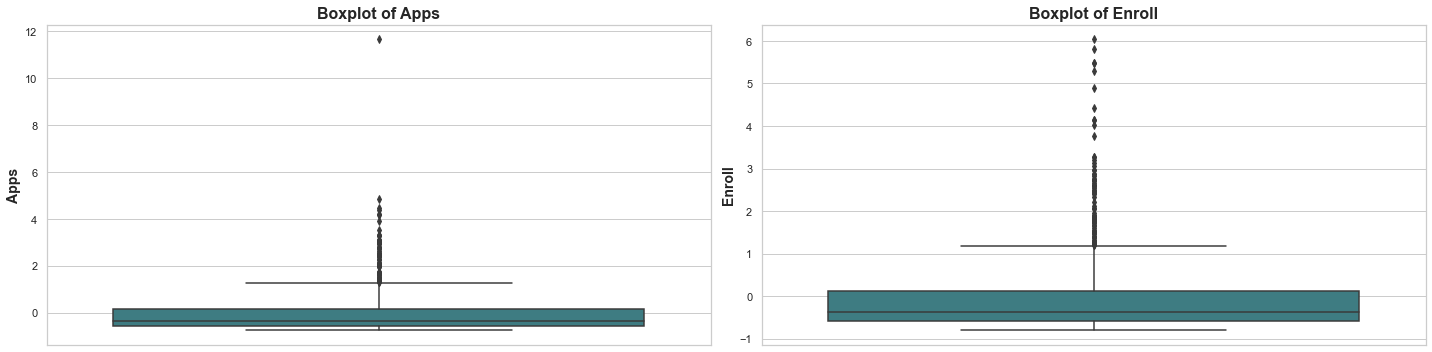

In [145]:
x = 0
plt.figure(figsize = (20,5))
for i in range(0,3):
    if i%2 == 0:
        x = x + 1
        plt.subplot(1,2,x)
        sns.boxplot(y = df2_scaled[Feature_List[i]], data = df2_scaled,palette = 'crest')
        plt.title(f"Boxplot of {Feature_List[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel( Feature_List[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

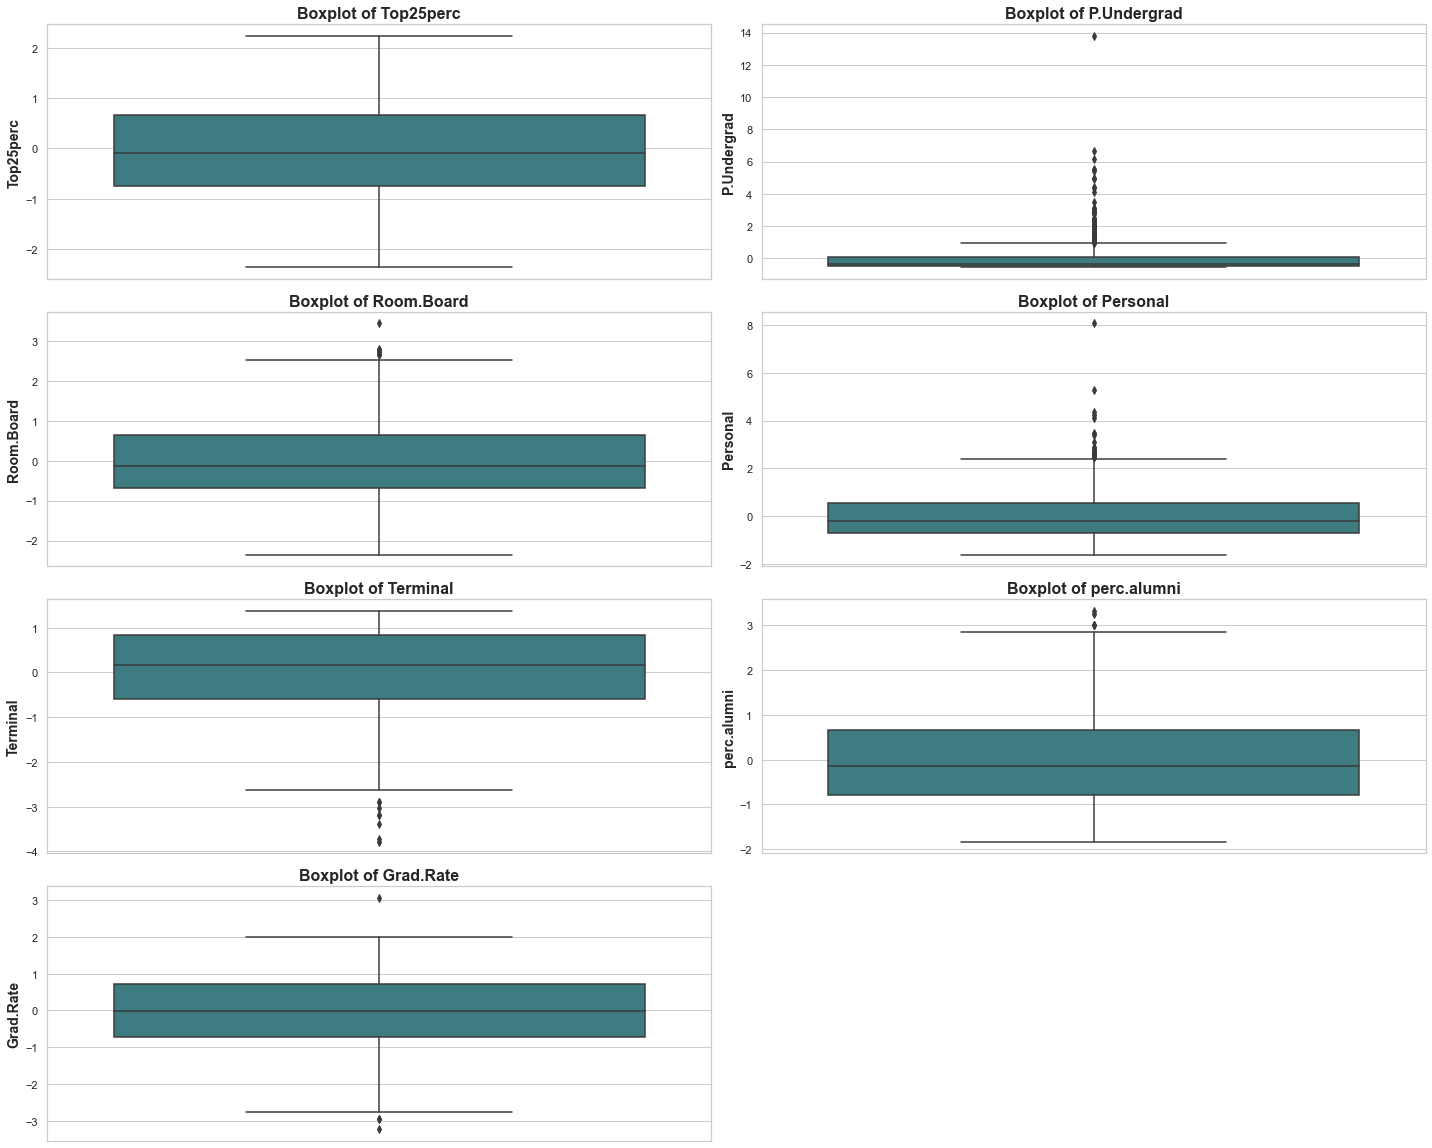

In [149]:
x = 0
plt.figure(figsize = (20,40))
for i in range(3,len(Feature_List)):
    if i%2 == 0:
        x = x + 1
        plt.subplot(10,2,x)
        sns.boxplot(y = df2_scaled[Feature_List[i]], data = df2_scaled,palette = 'crest')
        plt.title(f"Boxplot of {Feature_List[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel( Feature_List[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

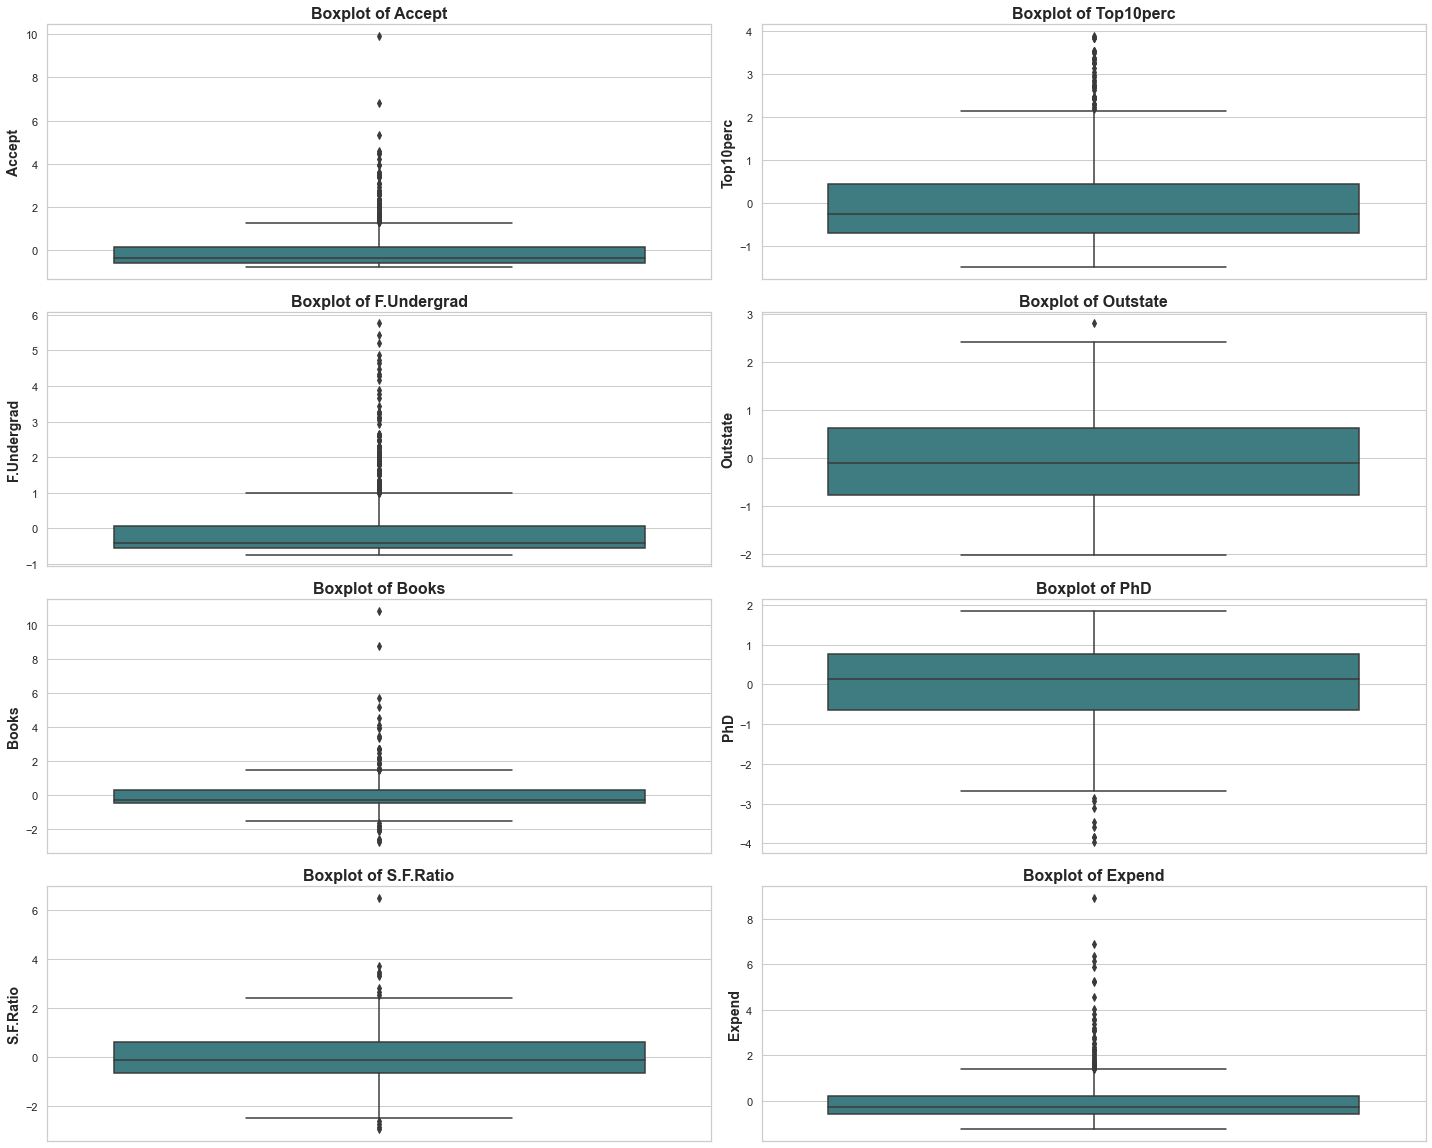

In [150]:
x = 0
plt.figure(figsize = (20,40))
for i in range(len(Feature_List)):
    if i%2 != 0:
        x = x + 1
        plt.subplot(10,2,x)
        sns.boxplot(y = df2_scaled[Feature_List[i]], data = df2_scaled,palette = 'crest')
        plt.title(f"Boxplot of {Feature_List[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel( Feature_List[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

def detect_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

for i in Feature_List:
    lr, ur = detect_outliers(df2[i])
    df2[i] = np.where(df2[i] > ur, ur,df2[i])
    df2[i] = np.where(df2[i] < lr, lr,df2[i])

### 5. Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]
### 6. Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features
#### Statistical tests to be done before PCA
#### Bartletts Test of Sphericity

Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

- H0: All variables in the data are uncorrelated
- Ha: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [158]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df2_scaled)

if p_value < 0.05:
    print(f"Correlations are significant {p_value}")

Correlations are significant 0.0


#### KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [159]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df2_scaled)
kmo_model

if kmo_model < 0.5:
    print(f"Not acceptable for kmo_model {kmo_model}")
else:
    print(f"Acceptable for kmo_model {kmo_model}")

Acceptable for kmo_model 0.8131251200373522


### Scree Plot Of PC with all features

In [244]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 33 to 8)
pca = PCA(n_components=17, random_state=123)
df_pca = pca.fit_transform(df2_scaled)
df_pca.transpose() # Component output

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [ 1.75239502e-03,  1.03709803e-01, -2.25582869e-02, ...,
         6.79013123e-02,  3.53597440e-01, -1.14873492e-01],
       [-9.31400698e-02, -5.02556890e-02, -4.05268301e-03, ...,
        -2.32023970e-01,  3.04416200e-01, -1.17076127e-01],
       [ 9.35522023e-02, -1.74057054e-01,  3.75875882e-03, ...,
        -9.99380421e-02,  3.35104811e-01, -2.57218339e-03]])

### Extract Eigen vectors of All PCs

In [245]:
# Loading of each feature on the components
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

### Extract Eigen values of All the features

In [246]:
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [200]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

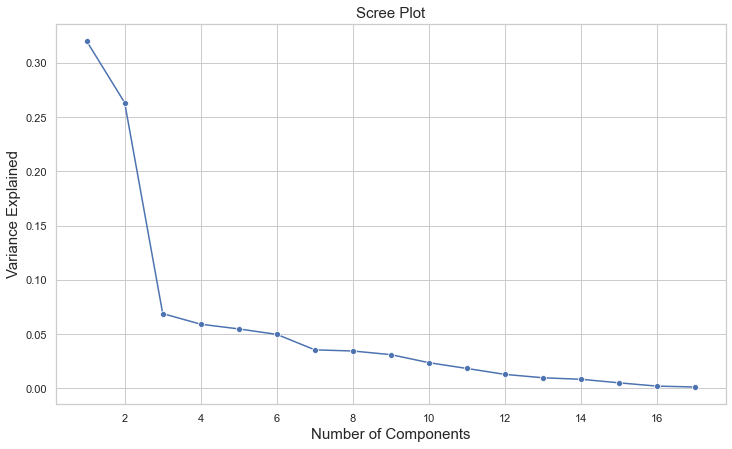

In [247]:
var_exp = pca.explained_variance_ratio_
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.show()

In [248]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7', 'PC8', 'PC9', 'PC10', 'PC11','PC12','PC13', 'PC14', 'PC15', 'PC16', 'PC17'],
                                    index = df2_scaled.columns)
df_extracted_loadings[['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7', 'PC8']]

PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8
Apps         0.25  0.33 -0.06  0.28  0.01 -0.02 -0.04 -0.10
Accept       0.21  0.37 -0.10  0.27  0.06  0.01 -0.01 -0.06
Enroll       0.18  0.40 -0.08  0.16 -0.06 -0.04 -0.03  0.06
Top10perc    0.35 -0.08  0.04 -0.05 -0.40 -0.05 -0.16 -0.12
Top25perc    0.34 -0.04 -0.02 -0.11 -0.43  0.03 -0.12 -0.10
F.Undergrad  0.15  0.42 -0.06  0.10 -0.04 -0.04 -0.03  0.08
P.Undergrad  0.03  0.32  0.14 -0.16  0.30 -0.19  0.06  0.57
Outstate     0.29 -0.25  0.05  0.13  0.22 -0.03  0.11  0.01
Room.Board   0.25 -0.14  0.15  0.18  0.56  0.16  0.21 -0.22
Books        0.06  0.06  0.68  0.09 -0.13  0.64 -0.15  0.21
Personal    -0.04  0.22  0.50 -0.23 -0.22 -0.33  0.63 -0.23
PhD          0.32  0.06 -0.13 -0.53  0.14  0.09 -0.00 -0.08
Terminal     0.32  0.05 -0.07 -0.52  0.20  0.15 -0.03 -0.01
S.F.Ratio   -0.18  0.25 -0.29 -0.16 -0.08  0.49  0.22 -0.08
perc.alumni  0.21 -0.25 -0.15  0.02 -0.22 -0.05  0.24  0.68
Expend       0.32 -0.13  0.23  0.08  0.08 -0.30 -0.23 -0.05
Grad.Rate    0.25 -0.17 -0.21  0.27 -0.11  0.22  0.56 -0.01

In [249]:
df_extracted_loadings[['PC9', 'PC10', 'PC11','PC12','PC13', 'PC14', 'PC15', 'PC16', 'PC17']]

PC9  PC10  PC11  PC12  PC13  PC14  PC15  PC16  PC17
Apps        -0.09  0.05  0.04  0.02  0.60  0.08  0.13  0.46  0.36
Accept      -0.18  0.04 -0.06 -0.15  0.29  0.03 -0.15 -0.52 -0.54
Enroll      -0.13  0.03 -0.07  0.01 -0.44 -0.09  0.03 -0.40  0.61
Top10perc    0.34  0.06 -0.01  0.04  0.00 -0.11  0.70 -0.15 -0.14
Top25perc    0.40  0.01 -0.27 -0.09  0.02  0.15 -0.62  0.05  0.08
F.Undergrad -0.06  0.02 -0.08  0.06 -0.52 -0.06  0.01  0.56 -0.41
P.Undergrad  0.56 -0.22  0.10 -0.06  0.13  0.02  0.02 -0.05  0.01
Outstate    -0.00  0.19  0.14 -0.82 -0.14 -0.03  0.04  0.10  0.05
Room.Board   0.28  0.30 -0.36  0.35 -0.07 -0.06  0.00 -0.03  0.00
Books       -0.13 -0.08  0.03 -0.03  0.01 -0.07 -0.01  0.00  0.00
Personal    -0.09  0.14 -0.02 -0.04  0.04  0.03 -0.00 -0.01 -0.00
PhD         -0.19 -0.12  0.04  0.02  0.13 -0.69 -0.11  0.03  0.01
Terminal    -0.25 -0.09 -0.06  0.02 -0.06  0.67  0.16 -0.03  0.01
S.F.Ratio    0.27  0.47  0.45 -0.01 -0.02  0.04 -0.02 -0.02 -0.00
perc.alumni -0.26  0.42 -0.13  0.18  0.10 -0.03 -0.01  0.00 -0.02
Expend      -0.05  0.13  0.69  0.33 -0.09  0.07 -0.23 -0.04 -0.04
Grad.Rate    0.04 -0.59  0.22  0.12 -0.07  0.04 -0.00 -0.01 -0.01

In [252]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df2_scaled))
df_pca_loading.shape

(17, 17)

In [254]:
df_pca_loading.head(3)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  0.25    0.21    0.18       0.35       0.34         0.15         0.03   
1  0.33    0.37    0.40      -0.08      -0.04         0.42         0.32   
2 -0.06   -0.10   -0.08       0.04      -0.02        -0.06         0.14   

   Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0      0.29        0.25   0.06     -0.04  0.32      0.32      -0.18   
1     -0.25       -0.14   0.06      0.22  0.06      0.05       0.25   
2      0.05        0.15   0.68      0.50 -0.13     -0.07      -0.29   

   perc.alumni  Expend  Grad.Rate  
0         0.21    0.32       0.25  
1        -0.25   -0.13      -0.17  
2        -0.15    0.23      -0.21

Let's identify which features have maximum loading across the components.

We will first plot the component loading on a heatmap.

For each feature, we find the maximum loading value across the components and mark the same with help of rectangular box.

Features marked with rectangular red box are the one having maximum loading on the respective component. We consider these marked features to decide the context that the component represents

In [255]:
from matplotlib.patches import Rectangle

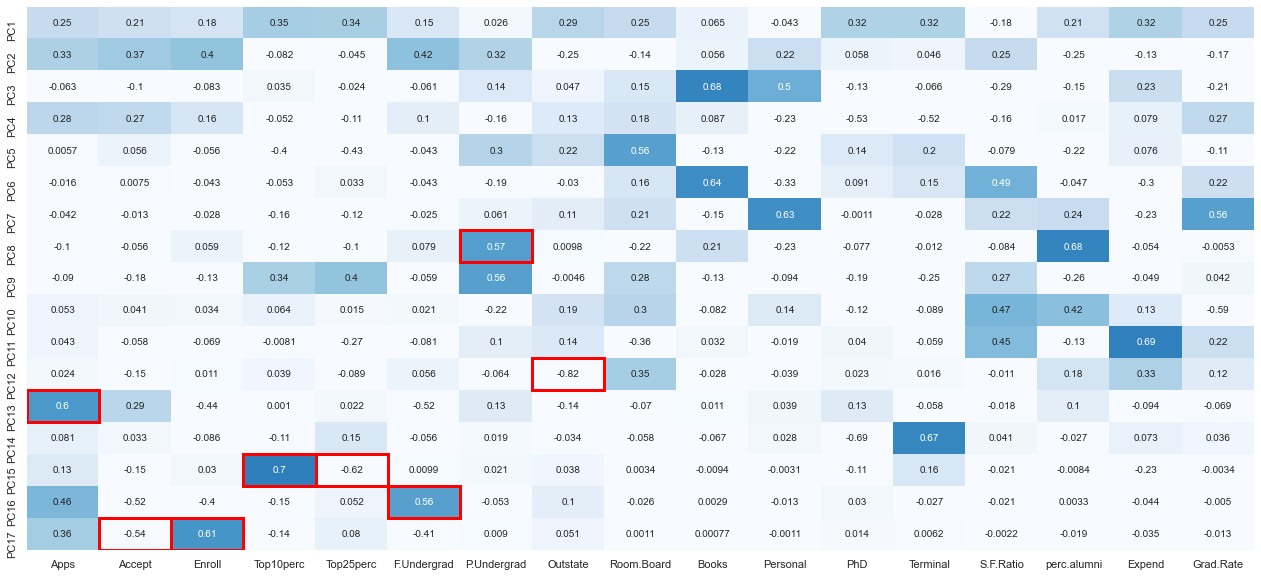

In [257]:
ig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns[:8]):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

### 7. Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [264]:
df_extracted_loadings[['PC1']]

PC1
Apps         0.25
Accept       0.21
Enroll       0.18
Top10perc    0.35
Top25perc    0.34
F.Undergrad  0.15
P.Undergrad  0.03
Outstate     0.29
Room.Board   0.25
Books        0.06
Personal    -0.04
PhD          0.32
Terminal     0.32
S.F.Ratio   -0.18
perc.alumni  0.21
Expend       0.32
Grad.Rate    0.25

**Linear equation of first PC**

0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F.Undergrad + 0.03 * P.Undergrad + 0.29 * Outstate + 0.25 * Room.Board + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal + -0.18 * S.F.Ratio + 0.21 * perc.alumni + 0.32 * Expend + 0.25 * Grad.Rate

In [272]:
#Check the cumlative explained variance ratio to verify the cut off for selected number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854])

### 8. Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

#### The cumulative values of the eigenvalues
When PCA was performed with all the fields, then the corresponding cumulative values of the eigenvalues were: 
[0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ]
       
From these Eigenvalues we can observe the following:
1. The first PC component alone contributes approx 32%.
2. If we choose first 6 components, cumulatively contributes to approx 81%.

Hence, those 6 components have been selected further. The cumulative values of the eigenvalues of those selected components are : [0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854]
       
#### Eigenvectors

Eigenvalues are simply the coefficients attached to eigenvectors, which give the axes magnitude. In this case, they are the measure of the data’s covariance. By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.
The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude.

### Scree Plot for Selected Pcs
**On the basis of cumlative explained variance ratio , we can choose first 6 PCs, which will cover 81% approximately**

In [267]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 33 to 8)
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(df2_scaled)
df_pca.transpose() # Component output

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352401e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073616e-01,  2.27879810e+00, -4.38092815e-01, ...,
        -4.05798710e-04,  2.07356387e+00, -1.32891523e+00],
       [-9.21749291e-01,  3.58891825e+00,  6.77240533e-01, ...,
         5.43164956e-02,  8.52053749e-01, -1.08022442e-01],
       [-7.43975435e-01,  1.05999660e+00, -3.69613276e-01, ...,
        -5.16021192e-01, -9.47754660e-01, -1.13217598e+00],
       [-2.98306092e-01, -1.77137311e-01, -9.60591689e-01, ...,
         4.68014225e-01, -2.06993735e+00,  8.39893075e-01]])

### Extract New Eigen vectors

In [268]:
# Loading of each feature on the components
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.06309209, -0.10124907, -0.08298558,  0.03505553, -0.02414794,
        -0.06139296,  0.13968171,  0.04659888,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131052,  0.26781736,  0.16182679, -0.05154725, -0.10976654,
         0.10041231, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.0792735 

### Extract New Eigen Values

In [269]:
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117])

### View Scree Plot

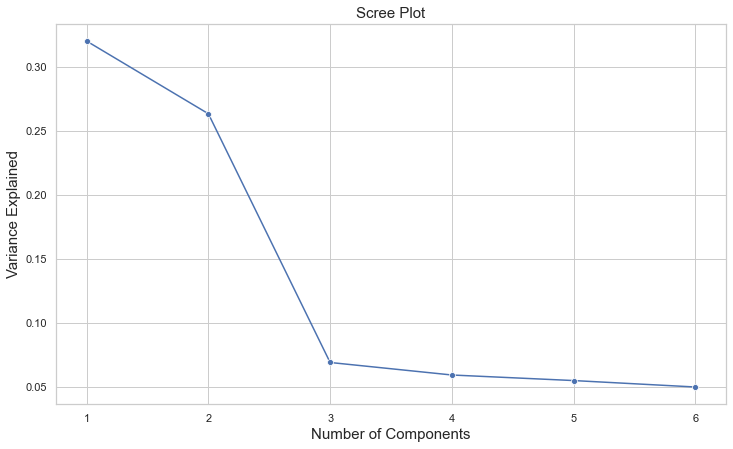

In [270]:
var_exp = pca.explained_variance_ratio_
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.show()

In [271]:
#Check the cumlative explained variance ratio to verify the cut off for selected number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854])

In [213]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6'],
                                    index = df2_scaled.columns)
df_extracted_loadings

PC1   PC2   PC3   PC4   PC5   PC6
Apps         0.25  0.33 -0.06  0.28  0.01 -0.02
Accept       0.21  0.37 -0.10  0.27  0.06  0.01
Enroll       0.18  0.40 -0.08  0.16 -0.06 -0.04
Top10perc    0.35 -0.08  0.04 -0.05 -0.40 -0.05
Top25perc    0.34 -0.04 -0.02 -0.11 -0.43  0.03
F.Undergrad  0.15  0.42 -0.06  0.10 -0.04 -0.04
P.Undergrad  0.03  0.32  0.14 -0.16  0.30 -0.19
Outstate     0.29 -0.25  0.05  0.13  0.22 -0.03
Room.Board   0.25 -0.14  0.15  0.18  0.56  0.16
Books        0.06  0.06  0.68  0.09 -0.13  0.64
Personal    -0.04  0.22  0.50 -0.23 -0.22 -0.33
PhD          0.32  0.06 -0.13 -0.53  0.14  0.09
Terminal     0.32  0.05 -0.07 -0.52  0.20  0.15
S.F.Ratio   -0.18  0.25 -0.29 -0.16 -0.08  0.49
perc.alumni  0.21 -0.25 -0.15  0.02 -0.22 -0.05
Expend       0.32 -0.13  0.23  0.08  0.08 -0.30
Grad.Rate    0.25 -0.17 -0.21  0.27 -0.11  0.22

In [214]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df2_scaled))
df_pca_loading.shape

(6, 17)

In [193]:
df_pca_loading

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  0.25    0.21    0.18       0.35       0.34         0.15         0.03   
1  0.33    0.37    0.40      -0.08      -0.04         0.42         0.32   
2 -0.06   -0.10   -0.08       0.04      -0.02        -0.06         0.14   
3  0.28    0.27    0.16      -0.05      -0.11         0.10        -0.16   
4  0.01    0.06   -0.06      -0.40      -0.43        -0.04         0.30   
5 -0.02    0.01   -0.04      -0.05       0.03        -0.04        -0.19   

   Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0      0.29        0.25   0.06     -0.04  0.32      0.32      -0.18   
1     -0.25       -0.14   0.06      0.22  0.06      0.05       0.25   
2      0.05        0.15   0.68      0.50 -0.13     -0.07      -0.29   
3      0.13        0.18   0.09     -0.23 -0.53     -0.52      -0.16   
4      0.22        0.56  -0.13     -0.22  0.14      0.20      -0.08   
5     -0.03        0.16   0.64     -0.33  0.09      0.15       0.49   

   perc.alumni  Expend  Grad.Rate  
0         0.21    0.32       0.25  
1        -0.25   -0.13      -0.17  
2        -0.15    0.23      -0.21  
3         0.02    0.08       0.27  
4        -0.22    0.08      -0.11  
5        -0.05   -0.30       0.22

Let's identify which features have maximum loading across the components.

We will first plot the component loading on a heatmap.

For each feature, we find the maximum loading value across the components and mark the same with help of rectangular box.

Features marked with rectangular red box are the one having maximum loading on the respective component. We consider these marked features to decide the context that the component represents

In [184]:
from matplotlib.patches import Rectangle

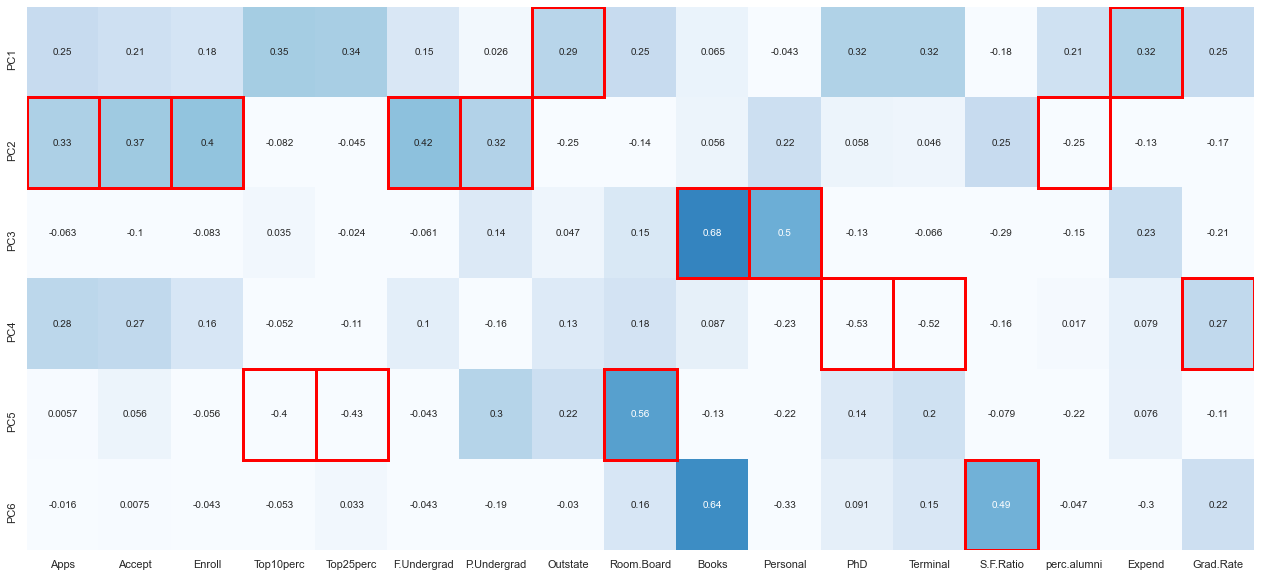

In [185]:
ig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5','PC6'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

Renaming the following components as follows:
1. PC1 : pc_Outstate_Expend
2. PC2 : pc_FUgrad_PUgrad
3. PC3 : pc_Books_Per
4. PC4 : pc_PHD_Ter
5. PC5 : pc_Top25_Room
6. PC6 : pc_SFRatio

In [219]:
df_pca = pd.DataFrame(df_pca,columns=['pc_Outstate_Expend','pc_FUgrad_PUgrad','pc_Books_Per','pc_PHD_Ter',
                                  'pc_Top25_Room','pc_SFRatio'])
df_pca.head()

pc_Outstate_Expend  pc_FUgrad_PUgrad  pc_Books_Per  pc_PHD_Ter  \
0               -1.59              0.77         -0.10       -0.92   
1               -2.19             -0.58          2.28        3.59   
2               -1.43             -1.09         -0.44        0.68   
3                2.86             -2.63          0.14       -1.30   
4               -2.21              0.02          2.39       -1.11   

   pc_Top25_Room  pc_SFRatio  
0          -0.74       -0.30  
1           1.06       -0.18  
2          -0.37       -0.96  
3          -0.18       -1.06  
4           0.68        0.00

In [220]:
df_pca.shape

(777, 6)

In [221]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pc_Outstate_Expend  777 non-null    float64
 1   pc_FUgrad_PUgrad    777 non-null    float64
 2   pc_Books_Per        777 non-null    float64
 3   pc_PHD_Ter          777 non-null    float64
 4   pc_Top25_Room       777 non-null    float64
 5   pc_SFRatio          777 non-null    float64
dtypes: float64(6)
memory usage: 36.5 KB


In [222]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pca.describe().T

count  mean  std   min   25%   50%  75%   max
pc_Outstate_Expend 777.00 -0.00 2.33 -5.66 -1.73 -0.30 1.34  8.05
pc_FUgrad_PUgrad   777.00  0.00 2.12 -3.59 -1.35 -0.63 0.69 12.00
pc_Books_Per       777.00  0.00 1.08 -2.94 -0.67 -0.10 0.49  9.01
pc_PHD_Ter         777.00 -0.00 1.00 -2.94 -0.66 -0.06 0.60  5.18
pc_Top25_Room      777.00 -0.00 0.97 -2.69 -0.70 -0.05 0.63  4.25
pc_SFRatio         777.00  0.00 0.92 -3.82 -0.52 -0.00 0.46  5.99

### 7. Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

#### Explicit form of the first PC
1. PC1 = 0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F.Undergrad + 0.03 * P.Undergrad + 0.29 * Outstate + 0.25 * Room.Board + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal + -0.18 * S.F.Ratio + 0.21 * perc.alumni + 0.32 * Expend + 0.25 * Grad.Rate
2. PC2 = 0.33 * Apps + 0.37 * Accept + 0.40 * Enroll + -0.08 * Top10perc + -0.04 * Top25perc + 0.42 * F.Undergrad + 0.32 * P.Undergrad + -0.25 * Outstate + -0.14 * Room.Board + 0.06 * Books + 0.22 * Personal + 0.06 * PhD + 0.05 * Terminal + 0.25 * S.F.Ratio + -0.25 * perc.alumni + -0.13 * Expend + -0.17 * Grad.Rate
3. PC3 = -0.06 * Apps + -0.10 * Accept + -0.08 * Enroll + 0.04 * Top10perc + -0.02 * Top25perc + -0.06 * F.Undergrad + 0.14 * P.Undergrad + 0.05 * Outstate + 0.15 * Room.Board + 0.68 * Books + 0.50 * Personal + -0.13 * PhD + -0.07 * Terminal + -0.29 * S.F.Ratio + -0.15 * perc.alumni + 0.23 * Expend + -0.21 * Grad.Rate
4. PC4 = 0.28 * Apps + 0.27 * Accept + 0.16 * Enroll + -0.05 * Top10perc + -0.11 * Top25perc + 0.10 * F.Undergrad + -0.16 * P.Undergrad + 0.13 * Outstate + 0.18 * Room.Board + 0.09 * Books + -0.23 * Personal + -0.53 * PhD + -0.52 * Terminal + -0.16 * S.F.Ratio + 0.02 * perc.alumni + 0.08 * Expend + 0.27 * Grad.Rate
5. PC5 = 0.01 * Apps + 0.06 * Accept + -0.06 * Enroll + -0.40 * Top10perc + -0.43 * Top25perc + -0.04 * F.Undergrad + 0.30 * P.Undergrad + 0.22 * Outstate + 0.56 * Room.Board + -0.13 * Books + -0.22 * Personal + 0.14 * PhD + 0.20 * Terminal + -0.08 * S.F.Ratio + -0.22 * perc.alumni + 0.08 * Expend + -0.11 * Grad.Rate
6. PC6 = -0.02 * Apps + 0.01 * Accept + -0.04 * Enroll + -0.05 * Top10perc + 0.03 * Top25perc + -0.04 * F.Undergrad + -0.19 * P.Undergrad + -0.03 * Outstate + 0.16 * Room.Board + 0.64 * Books + -0.33 * Personal + 0.09 * PhD + 0.15 * Terminal + 0.49 * S.F.Ratio + -0.05 * perc.alumni + -0.30 * Expend + 0.22 * Grad.Rate



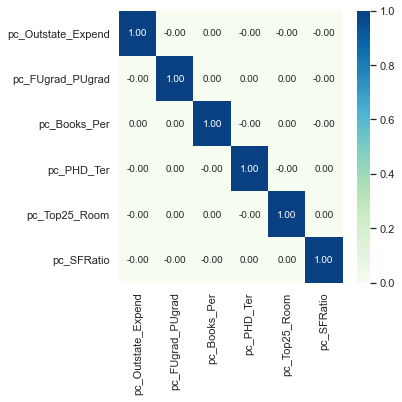

In [227]:
plt.figure(figsize=(5,5))
sns.heatmap(df_pca.corr(),annot=True,fmt=".2f",cmap='GnBu');